# Importing Libraries

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import holidays
from datetime import date
import geopandas as gpd
from shapely.geometry import Point
import folium
from shapely.geometry import MultiPoint
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from sklearn.neighbors import NearestNeighbors
import itertools

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

# Read CSV

In [2]:
df_full = pd.read_csv('/Users/kimberleybrown/Desktop/CODING_ALL/Code_Academy_Berlin/Module01/Module01_Project03/data_provided/CBS_2021-2023_Full.csv')

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_87913/3192347137.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv('/Users/kimberleybrown/Desktop/CODING_ALL/Code_Academy_Berlin/Module01/Module01_Project03/data_provided/CBS_2021-2023_Full.csv')


# SneakPeak Data

## .head()

In [3]:
print('df_full')
print(df_full.head())


df_full
            ride_id  rideable_type           started_at             ended_at  \
0  5CB9DFCECF79AF84   classic_bike  2021-01-01 00:08:33  2021-01-01 00:33:53   
1  629E059504606547  electric_bike  2021-01-01 00:13:43  2021-01-01 00:29:34   
2  E74069873161EE33  electric_bike  2021-01-01 00:14:32  2021-01-01 00:28:45   
3  91F95E512CABC46A   classic_bike  2021-01-01 00:15:45  2021-01-01 00:21:20   
4  DA46A05139C0EA2F   classic_bike  2021-01-01 00:17:46  2021-01-01 00:21:00   

              start_station_name start_station_id  \
0          Maine Ave & 9th St SW          31646.0   
1                 10th & U St NW          31111.0   
2          17th & Corcoran St NW          31214.0   
3  Wilson Blvd. & N. Vermont St.          31926.0   
4              11th & Park Rd NW          31651.0   

                           end_station_name end_station_id  start_lat  \
0  Rosslyn Metro / Wilson Blvd & Ft Myer Dr        31015.0  38.880440   
1                                       NaN   

## .columns

In [4]:
print('df_full')
print(df_full.columns)


df_full
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


# ----------------------------------------------

# Full CSV

## Cleaning

### Check for Null

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.0+ GB


### Check for Null again

In [6]:
df_full.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

### Drop Nulls

In [7]:
df_full = df_full.dropna()
df_full.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

### Check for duplicated

In [8]:
df_full.duplicated().sum()

np.int64(0)

### Turn to lowerscase no space

In [9]:
df_full.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [10]:
df_full.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual


### Datetime

In [11]:
df_full['started_at'] = pd.to_datetime(df_full['started_at'])
df_full['ended_at'] = pd.to_datetime(df_full['ended_at'])
print(df_full['started_at'].info())
print(df_full['ended_at'].info())

df_full['year'] = df_full['started_at'].dt.year
df_full['month'] = df_full['started_at'].dt.month
df_full['weekday'] = df_full['started_at'].dt.day_name()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_full['weekday'] = pd.Categorical(df_full['weekday'], categories=weekday_order, ordered=True)


<class 'pandas.core.series.Series'>
Index: 9572692 entries, 0 to 10693995
Series name: started_at
Non-Null Count    Dtype         
--------------    -----         
9572692 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 146.1 MB
None
<class 'pandas.core.series.Series'>
Index: 9572692 entries, 0 to 10693995
Series name: ended_at
Non-Null Count    Dtype         
--------------    -----         
9572692 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 146.1 MB
None


### Weekday / Weekend

In [12]:

df_full['day_type'] = df_full['weekday'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

df_full['day_type']


0           Weekday
2           Weekday
3           Weekday
4           Weekday
6           Weekday
             ...   
10693991    Weekend
10693992    Weekend
10693993    Weekend
10693994    Weekend
10693995    Weekend
Name: day_type, Length: 9572692, dtype: object

### Holiday

In [13]:
# Define custom WA state holidays (if needed)
wa_holidays = holidays.US()
# Add any Washington-specific ones manually
wa_holidays.append({date(2025, 4, 16): "Washington State Holiday Example"})

# Check if a date is a holiday
print(date(2025, 7, 4) in wa_holidays)  # True (Independence Day)
print(wa_holidays.get(date(2025, 7, 4)))  # 'Independence Day'

df_full['holiday'] = df_full['started_at'].dt.date.apply(lambda holiday: 1 if holiday in wa_holidays else 0)

df_full['is_holiday'] = df_full['holiday'].map({0: 'No', 1: 'Yes'})
print(df_full['year'].unique())

#Check year 2021

df_full_weather_2021 = df_full[df_full['year'] == 2021].copy()
df_full_weather_2021.loc[:,'weekday_num'] = df_full_weather_2021['started_at'].dt.weekday
weekend_rows_2021 = df_full_weather_2021[df_full_weather_2021['weekday_num'] >= 5]

holiday_dates_weekend2021 = weekend_rows_2021[weekend_rows_2021['holiday'] == 1]['started_at'].dt.date.unique()
print(f"In 2021 there were {len(holiday_dates_weekend2021)} weekend days that were holidays")

#Check year 2022
df_full_weather_2022 = df_full[df_full['year'] == 2022].copy()
df_full_weather_2022.loc[:,'weekday_num'] = df_full_weather_2022['started_at'].dt.weekday
weekend_rows_2022 = df_full_weather_2022[df_full_weather_2022['weekday_num'] >= 5]

holiday_dates_weekend2022 = weekend_rows_2022[weekend_rows_2022['holiday'] == 1]['started_at'].dt.date.unique()
print(f"In 2022 there were {len(holiday_dates_weekend2022)} weekend days that were holidays")

#Check year 2023
df_full_weather_2023 = df_full[df_full['year'] == 2023].copy()
df_full_weather_2023.loc[:,'weekday_num'] = df_full_weather_2023['started_at'].dt.weekday
weekend_rows_2023 = df_full_weather_2023[df_full_weather_2023['weekday_num'] >= 5]

holiday_dates_weekend2023 = weekend_rows_2023[weekend_rows_2023['holiday'] == 1]['started_at'].dt.date.unique()
print(f"In 2023 there were {len(holiday_dates_weekend2023)} weekend days that were holidays")






True
Independence Day
[2021 2022 2023]
In 2021 there were 3 weekend days that were holidays
In 2022 there were 3 weekend days that were holidays
In 2023 there were 2 weekend days that were holidays


### Season CHECK !!

In [14]:
def get_season(date):
    month = date.month
    day = date.day

    if (month == 12 and day >= 21) or (month in [1, 2]) or (month == 3 and day < 20):
        return 1
    elif (month == 3 and day >= 20) or (month in [4, 5]) or (month == 6 and day < 21):
        return 2
    elif (month == 6 and day >= 21) or (month in [7, 8]) or (month == 9 and day < 23):
        return 3
    else:
        return 4

df_full['season'] = df_full['started_at'].apply(get_season)

df_full.loc[df_full['season'] == 1, 'season_name'] = 'Winter'
df_full.loc[df_full['season'] == 2, 'season_name'] = 'Spring'
df_full.loc[df_full['season'] == 3, 'season_name'] = 'Summer'
df_full.loc[df_full['season'] == 4, 'season_name'] = 'Fall'



df_full['season'].isnull().sum()

np.int64(0)

### Weather

In [15]:
df_full.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,year,month,weekday,day_type,holiday,is_holiday,season,season_name
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,-77.072305,member,2021,1,Friday,Weekday,1,Yes,1,Winter
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,-77.031691,member,2021,1,Friday,Weekday,1,Yes,1,Winter
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,-77.114563,member,2021,1,Friday,Weekday,1,Yes,1,Winter
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,...,-77.032956,member,2021,1,Friday,Weekday,1,Yes,1,Winter
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,...,-76.988039,casual,2021,1,Friday,Weekday,1,Yes,1,Winter


### Time and Date Separate

In [16]:
# I wanted to separate time and date and fidn a way to wrap aroudn time but realised that you cant have time without date. 


### Ride Length

In [17]:
# Find a pattern in this mistake. 
# This could be one of the targets of our talk, to fix their accuracy. 
# Is it all in the same geolocation? What is the similarity between all of these negative ones. 

In [18]:
# I had 385 negative numbers so I decided to drop them as it is not significant given the size of our data. 

In [19]:
cross_midnight = df_full[df_full['ended_at'] < df_full['started_at']]
print(f"Number of rides crossing midnight or with negative duration: {len(cross_midnight)}")

df_full = df_full.drop(cross_midnight.index)
# print(cross_midnight[['started_at', 'ended_at', 'ride_duration_min']].head(10))



Number of rides crossing midnight or with negative duration: 385


In [20]:
df_full['ride_duration_min'] = df_full['ended_at'] - df_full['started_at']
df_full['ride_duration_min'] = (df_full['ride_duration_min'].dt.total_seconds() / 60).round(2)
df_full['ride_duration_min']

print("Min duration (minutes):", df_full['ride_duration_min'].min())
print("Max duration (minutes):", df_full['ride_duration_min'].max())
print("Median duration (minutes):", df_full['ride_duration_min'].median())

Min duration (minutes): 0.0
Max duration (minutes): 54540.47
Median duration (minutes): 11.55


### Ride Length Outliers

In [21]:
Q1 = df_full['ride_duration_min'].quantile(0.25)
Q3 = df_full['ride_duration_min'].quantile(0.75)

print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
upper_bound_updated = 120

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

Q1 (25th percentile): 6.7
Q3 (75th percentile): 20.28
Lower bound: -13.670000000000005
Upper bound: 40.650000000000006


In [22]:
outliers = df_full[df_full['ride_duration_min'] > upper_bound_updated]
print(len(outliers))
print(outliers['ride_duration_min'].describe())

118726
count    118726.000000
mean        354.749374
std        1233.299364
min         120.020000
25%         136.280000
50%         162.430000
75%         232.720000
max       54540.470000
Name: ride_duration_min, dtype: float64


In [23]:
between_40_and_120 = df_full[(df_full['ride_duration_min'] > 120) & (df_full['ride_duration_min'] <= 200)]
print(f"Number of rides between 40 and 120 minutes: {len(between_40_and_120)}")

Number of rides between 40 and 120 minutes: 80045


In [24]:
df_full = df_full[df_full['ride_duration_min'] <= upper_bound_updated]

In [25]:
df_full['ride_duration_min'] = df_full['ended_at'] - df_full['started_at']
df_full['ride_duration_min'] = (df_full['ride_duration_min'].dt.total_seconds() / 60).round(2)
df_full['ride_duration_min']

print("Min duration (minutes):", df_full['ride_duration_min'].min())
print("Max duration (minutes):", df_full['ride_duration_min'].max())
print("Median duration (minutes):", df_full['ride_duration_min'].median())

Min duration (minutes): 0.0
Max duration (minutes): 120.0
Median duration (minutes): 11.42


### GeoData

In [26]:

# df_full_copy = df_full.copy()

df_full['geometry_start'] = gpd.points_from_xy(df_full['start_lng'], df_full['start_lat'])
df_full['geometry_end'] = gpd.points_from_xy(df_full['end_lng'], df_full['end_lat'])

gdf_full = gpd.GeoDataFrame(df_full, geometry='geometry_start')
gdf_full = gdf_full.set_geometry('geometry_end')


print(gdf_full.head())
print(type(gdf_full))

            ride_id  rideable_type          started_at            ended_at  \
0  5CB9DFCECF79AF84   classic_bike 2021-01-01 00:08:33 2021-01-01 00:33:53   
2  E74069873161EE33  electric_bike 2021-01-01 00:14:32 2021-01-01 00:28:45   
3  91F95E512CABC46A   classic_bike 2021-01-01 00:15:45 2021-01-01 00:21:20   
4  DA46A05139C0EA2F   classic_bike 2021-01-01 00:17:46 2021-01-01 00:21:00   
6  0535306B61EF92F9   classic_bike 2021-01-01 00:19:06 2021-01-01 00:36:28   

               start_station_name start_station_id  \
0           Maine Ave & 9th St SW          31646.0   
2           17th & Corcoran St NW          31214.0   
3   Wilson Blvd. & N. Vermont St.          31926.0   
4               11th & Park Rd NW          31651.0   
6  Bladensburg Rd & Benning Rd NE          31617.0   

                           end_station_name end_station_id  start_lat  \
0  Rosslyn Metro / Wilson Blvd & Ft Myer Dr        31015.0  38.880440   
2                      14th & Belmont St NW        31119.0  

### start_station_id to INT

In [27]:
df_full['start_station_id'] = df_full['start_station_id'].astype('float').astype('Int64')
df_full['end_station_id'] = df_full['end_station_id'].astype('float').astype('Int64')

df_full['end_station_id'].info()

<class 'pandas.core.series.Series'>
Index: 9453581 entries, 0 to 10693993
Series name: end_station_id
Non-Null Count    Dtype
--------------    -----
9453581 non-null  Int64
dtypes: Int64(1)
memory usage: 153.3 MB


In [28]:
df_full.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,month,weekday,day_type,holiday,is_holiday,season,season_name,ride_duration_min,geometry_start,geometry_end
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,...,1,Friday,Weekday,1,Yes,1,Winter,25.33,POINT (-77.02524 38.88044),POINT (-77.0723 38.8946)
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214,14th & Belmont St NW,31119,38.912138,-77.038568,...,1,Friday,Weekday,1,Yes,1,Winter,14.22,POINT (-77.03857 38.91214),POINT (-77.03169 38.92087)
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926,Wilson Blvd. & N. Vermont St.,31926,38.879477,-77.114563,...,1,Friday,Weekday,1,Yes,1,Winter,5.58,POINT (-77.11456 38.87948),POINT (-77.11456 38.87948)
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,...,1,Friday,Weekday,1,Yes,1,Winter,3.23,POINT (-77.02825 38.93132),POINT (-77.03296 38.93199)
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617,Good Hope Rd & MLK Ave SE,31802,38.900413,-76.982872,...,1,Friday,Weekday,1,Yes,1,Winter,17.37,POINT (-76.98287 38.90041),POINT (-76.98804 38.86737)
8,CB36F43FA77E4A35,docked_bike,2021-01-01 00:21:19,2021-01-01 00:33:31,15th & F St NE,31632,1st & M St SE,31650,38.897195,-76.983575,...,1,Friday,Weekday,1,Yes,1,Winter,12.20,POINT (-76.98358 38.8972),POINT (-77.00607 38.87689)
9,874D92427D41BC30,classic_bike,2021-01-01 00:21:39,2021-01-01 00:31:07,14th & Otis Pl NW,31131,14th & R St NW,31202,38.934405,-77.032687,...,1,Friday,Weekday,1,Yes,1,Winter,9.47,POINT (-77.03269 38.9344),POINT (-77.03201 38.91305)
10,24ECE930048A9B67,classic_bike,2021-01-01 00:23:05,2021-01-01 00:37:02,Lincoln Park / 13th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,31619,38.890461,-76.988355,...,1,Friday,Weekday,1,Yes,1,Winter,13.95,POINT (-76.98836 38.89046),POINT (-76.98836 38.89046)
11,DA579474AAD89387,classic_bike,2021-01-01 00:24:12,2021-01-01 00:47:47,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,14th St & New York Ave NW,31216,38.890539,-77.049383,...,1,Friday,Weekday,1,Yes,1,Winter,23.58,POINT (-77.04938 38.89054),POINT (-77.03169 38.89963)
12,1DE392338FF58AC7,classic_bike,2021-01-01 00:24:12,2021-01-01 00:47:54,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,14th St & New York Ave NW,31216,38.890539,-77.049383,...,1,Friday,Weekday,1,Yes,1,Winter,23.70,POINT (-77.04938 38.89054),POINT (-77.03169 38.89963)


### df_capacity_complete

In [29]:
# df_capacity = pd.read_csv('/Users/kimberleybrown/Desktop/CODING_ALL/Code_Academy_Berlin/Module01/Module01_Project03/data_provided/capacity_data.csv')

In [30]:
# df_capacity['start_station_name;capacity'].nunique()

In [31]:
# # Split the column at ":"
# df_capacity[['start_station_name', 'capacity']] = df_capacity['start_station_name;capacity'].str.split(';', expand=True)

# # Optional: convert capacity to numeric
# df_capacity['capacity'] = pd.to_numeric(df_capacity['capacity'])

# # Drop the old combined column
# df_capacity = df_capacity.drop(columns=['start_station_name;capacity'])


In [32]:
# # Unique station names in each
# full_stations = set(df_full['start_station_name'].unique())
# capacity_stations = set(df_capacity['start_station_name'].unique())

# # Stations that are in both
# matching_stations = full_stations.intersection(capacity_stations)
# print(f"Number of matching stations: {len(matching_stations)}")

# # Optional: stations that are missing in capacity
# missing_in_capacity = full_stations - capacity_stations
# print(f"Stations in df_full but not in df_capacity: {len(missing_in_capacity)}")

# # Optional: stations in capacity but not in df_full
# extra_in_capacity = capacity_stations - full_stations
# print(f"Stations in df_capacity but not in df_full: {len(extra_in_capacity)}")

# print(extra_in_capacity)


In [33]:
# df_capacity = df_capacity[df_capacity['start_station_name'].isin(full_stations)]

In [34]:
# # Unique station names in each
# full_stations = set(df_full['start_station_name'].unique())
# capacity_stations = set(df_capacity['start_station_name'].unique())

# # Stations that are in both
# matching_stations = full_stations.intersection(capacity_stations)
# print(f"Number of matching stations: {len(matching_stations)}")

# # Optional: stations that are missing in capacity
# missing_in_capacity = full_stations - capacity_stations
# print(f"Stations in df_full but not in df_capacity: {len(missing_in_capacity)}")

# # Optional: stations in capacity but not in df_full
# extra_in_capacity = capacity_stations - full_stations
# print(f"Stations in df_capacity but not in df_full: {len(extra_in_capacity)}")

# print(extra_in_capacity)


### Up to here trying to fill in the avarages of the missing count on the stations. 

#### Average from 10 closest stations

## EDA

### Length of Ride Count

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_87913/3891041089.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


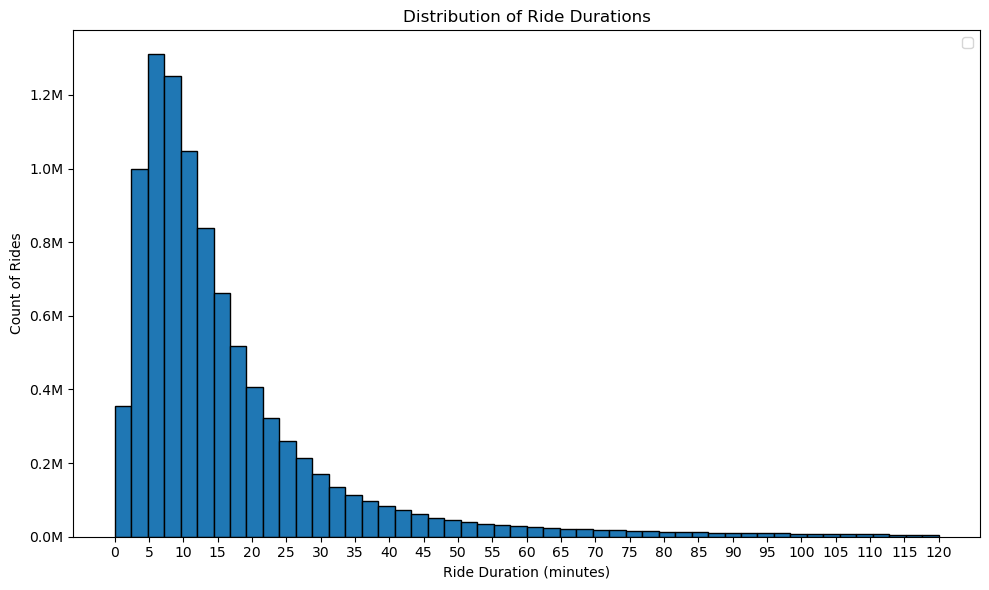

In [35]:
plt.figure(figsize=(10,6))  # Optional: set figure size for readability
plt.hist(df_full['ride_duration_min'], bins=50, edgecolor='black')  # bins = how many bars
plt.xlabel('Ride Duration (minutes)')
plt.xticks(range(0, 121, 5))
plt.ylabel('Count of Rides')
plt.title('Distribution of Ride Durations')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M'))

plt.tight_layout()
plt.legend()
plt.show()


/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_87913/2371007458.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


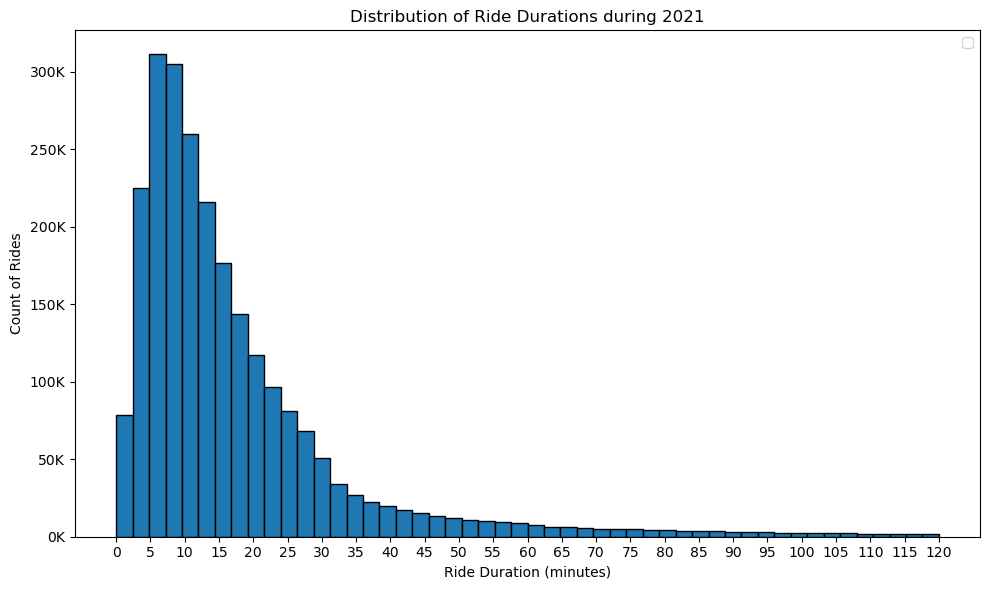

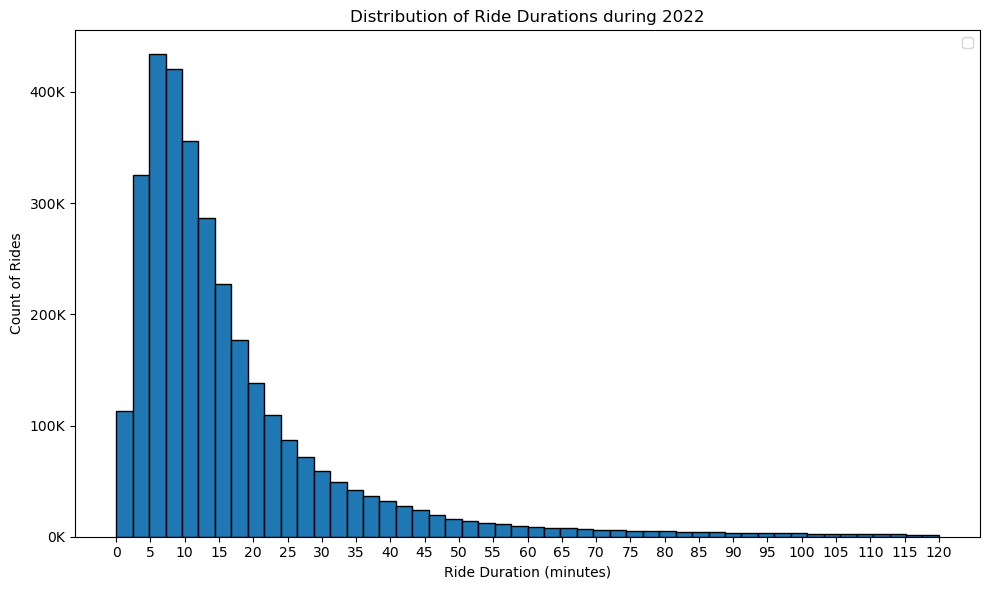

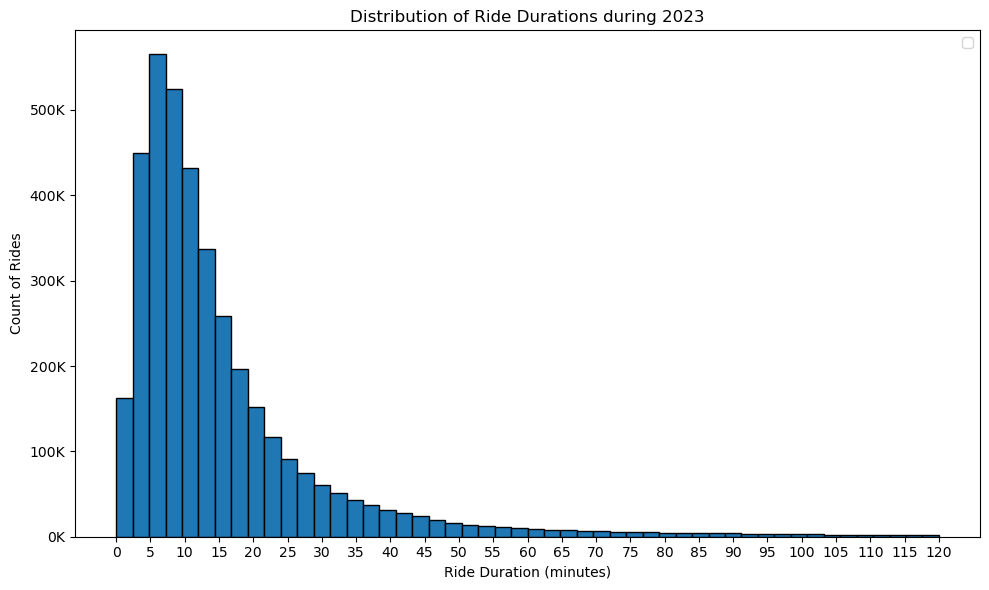

In [36]:
unique_years = sorted(df_full['year'].unique())

for year in unique_years:
    plt.figure(figsize=(10,6))  # Optional: set figure size for readability
    data_year = df_full[df_full['year'] == year]
    plt.hist(data_year['ride_duration_min'], bins=50, edgecolor='black')  # bins = how many bars
    plt.xlabel('Ride Duration (minutes)')
    plt.xticks(range(0, 121, 5))
    plt.ylabel('Count of Rides')
    plt.title(f'Distribution of Ride Durations during {year}')

    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-3:.0f}K'))

    plt.tight_layout()
    plt.legend()
    plt.show()  

#### Casual users lenght of ride

In [37]:
df_full.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'year', 'month', 'weekday', 'day_type', 'holiday',
       'is_holiday', 'season', 'season_name', 'ride_duration_min',
       'geometry_start', 'geometry_end'],
      dtype='object')

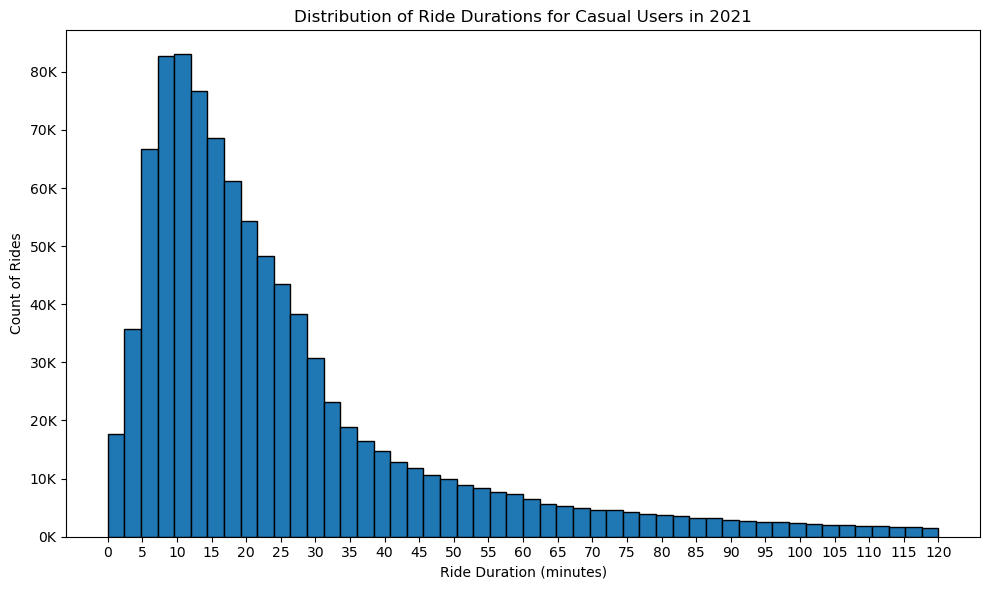

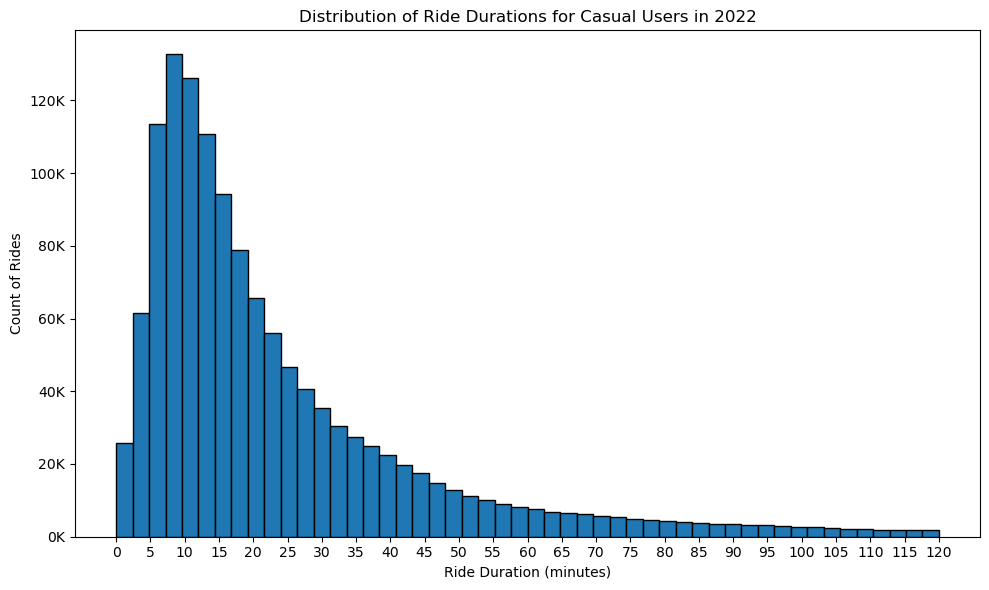

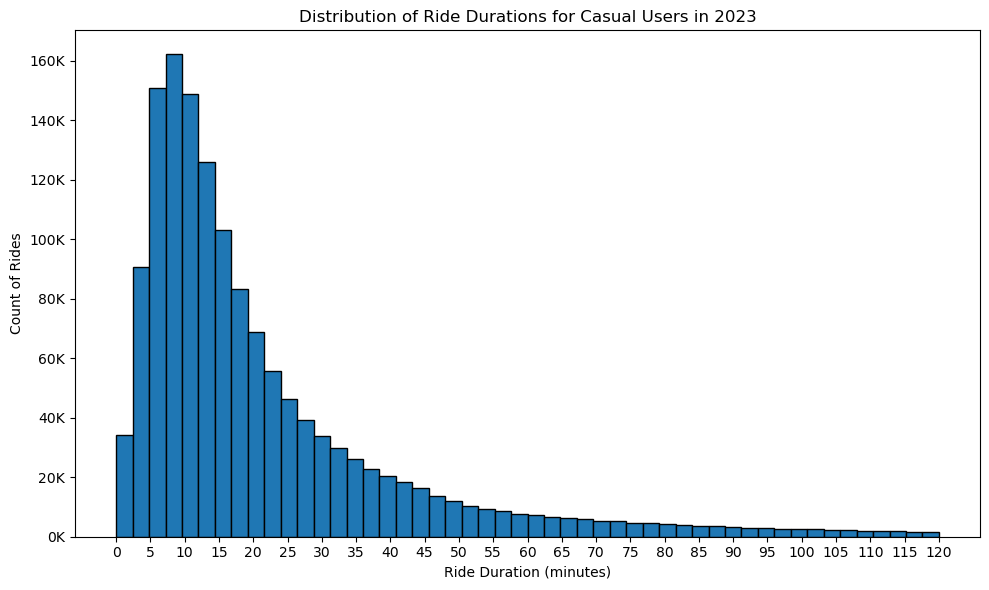

In [38]:
# Filter only casual users
df_casual = df_full[df_full['member_casual'] == 'casual']

unique_years = sorted(df_casual['year'].unique())

for year in unique_years:
    plt.figure(figsize=(10,6))
    
    data_year = df_casual[df_casual['year'] == year]
    plt.hist(data_year['ride_duration_min'], bins=50, edgecolor='black')
    
    plt.xlabel('Ride Duration (minutes)')
    plt.xticks(range(0, 121, 5))
    plt.ylabel('Count of Rides')
    plt.title(f'Distribution of Ride Durations for Casual Users in {year}')
    
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-3:.0f}K'))
    
    plt.tight_layout()
    plt.show()


### Length Ride Weekday vs Weekend

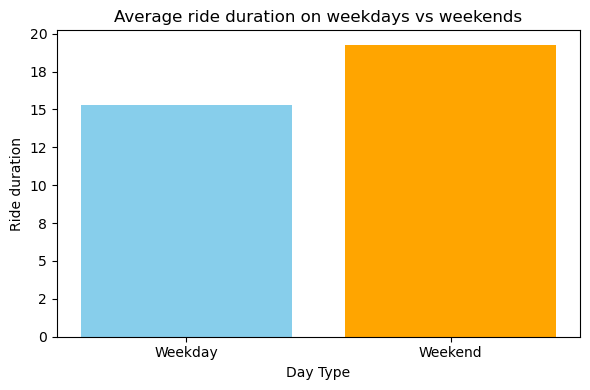

In [39]:
weekday_avg = df_full[df_full['day_type'] == 'Weekday']['ride_duration_min'].mean()

weekend_avg = df_full[df_full['day_type'] == 'Weekend']['ride_duration_min'].mean()


averages = [weekday_avg, weekend_avg]
labels = ['Weekday', 'Weekend']

plt.figure(figsize=(6,4))
plt.bar(labels, averages, color=['skyblue', 'orange'])

plt.xlabel('Day Type')
plt.ylabel('Ride duration')
plt.title(f'Average ride duration on weekdays vs weekends')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}'))

plt.tight_layout()

plt.show()  


/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_87913/1983653534.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


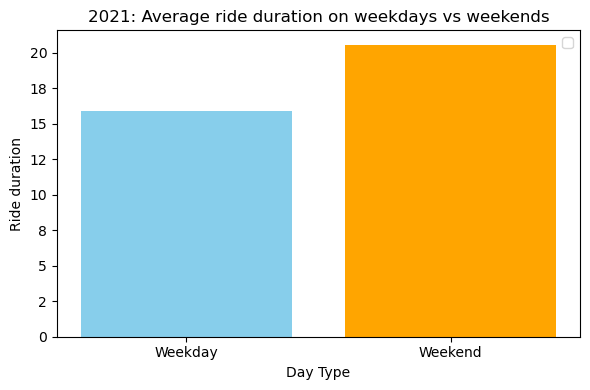

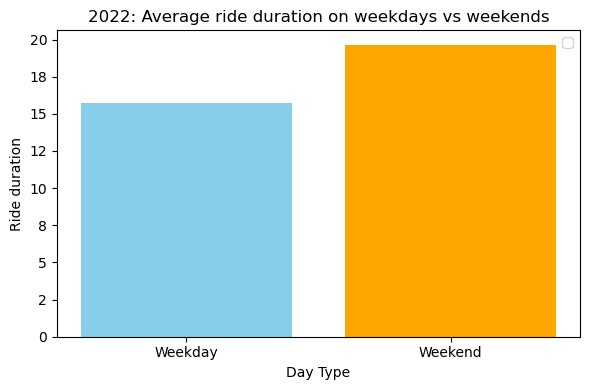

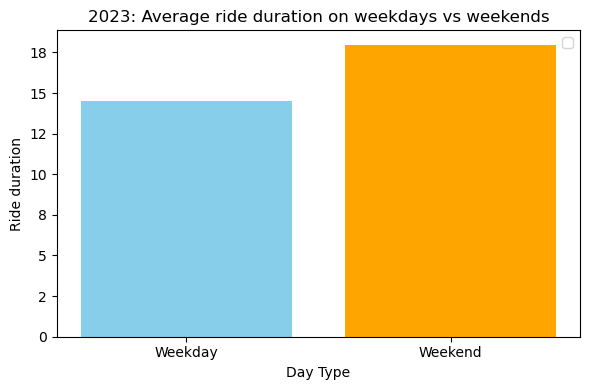

In [40]:
unique_years = sorted(df_full['year'].unique())

weekday_avg = df_full[df_full['day_type'] == 'Weekday']['ride_duration_min'].mean()

weekend_avg = df_full[df_full['day_type'] == 'Weekend']['ride_duration_min'].mean()


labels = ['Weekday', 'Weekend']


for year in unique_years:

    df_year = df_full[df_full['year'] == year]

    weekday_avg_unique = df_year[df_year['day_type'] == 'Weekday']['ride_duration_min'].mean()

    weekend_avg_unique = df_year[df_year['day_type'] == 'Weekend']['ride_duration_min'].mean()
    averages_unique = [weekday_avg_unique, weekend_avg_unique]

    plt.figure(figsize=(6,4))
    plt.bar(labels, averages_unique, color=['skyblue', 'orange'])

    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}'))
    
    plt.xlabel('Day Type')
    plt.ylabel('Ride duration')
    plt.title(f'{year}: Average ride duration on weekdays vs weekends')
    plt.tight_layout()
    plt.legend()
    plt.show()  

### Length Ride Weekday comparison

In [41]:
df_full.weekday

0           Friday
2           Friday
3           Friday
4           Friday
6           Friday
             ...  
10693989    Sunday
10693990    Sunday
10693991    Sunday
10693992    Sunday
10693993    Sunday
Name: weekday, Length: 9453581, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_87913/2356246123.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_avg = df_full.groupby('weekday')['ride_duration_min'].mean().reset_index()


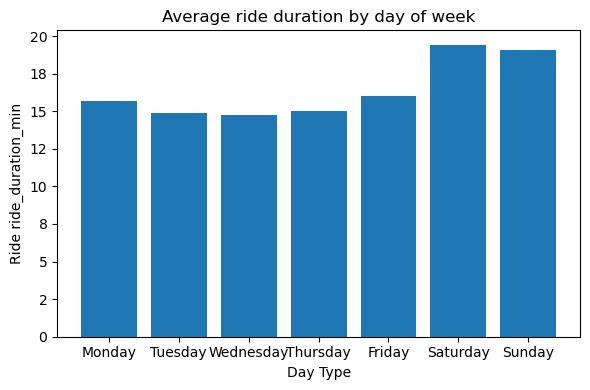

In [42]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Get the weekday avarage for each day of the week. 
weekday_avg = df_full.groupby('weekday')['ride_duration_min'].mean().reset_index()

# Make 'weekday' a categorical column with the desired order
weekday_avg['weekday'] = pd.Categorical(weekday_avg['weekday'], categories=weekday_order, ordered=True)

# Sort by this categorical order
weekday_avg = weekday_avg.sort_values('weekday')

plt.figure(figsize=(6,4))
plt.bar(weekday_avg['weekday'], weekday_avg['ride_duration_min'])

plt.xlabel('Day Type')
plt.ylabel('Ride ride_duration_min')
plt.title(f'Average ride duration by day of week')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}'))

plt.tight_layout()

plt.show()  

### MAPS

#### Main Map

In [43]:
df_full.start_lng

0          -77.025236
2          -77.038568
3          -77.114563
4          -77.028247
6          -76.982872
              ...    
10693989   -77.046570
10693990   -77.041829
10693991   -76.995234
10693992   -77.055911
10693993   -76.995396
Name: start_lng, Length: 9453581, dtype: float64

In [44]:
f = folium.Figure(width=1500, height=500)
m = folium.Map(location=[38.884185,-76.995396], zoom_start=10, max_zoom=18, min_zoom=0).add_to(f)

#### Top 20 stations. 

In [45]:
df_full.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,month,weekday,day_type,holiday,is_holiday,season,season_name,ride_duration_min,geometry_start,geometry_end
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,...,1,Friday,Weekday,1,Yes,1,Winter,25.33,POINT (-77.02524 38.88044),POINT (-77.0723 38.8946)
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214,14th & Belmont St NW,31119,38.912138,-77.038568,...,1,Friday,Weekday,1,Yes,1,Winter,14.22,POINT (-77.03857 38.91214),POINT (-77.03169 38.92087)
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926,Wilson Blvd. & N. Vermont St.,31926,38.879477,-77.114563,...,1,Friday,Weekday,1,Yes,1,Winter,5.58,POINT (-77.11456 38.87948),POINT (-77.11456 38.87948)
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,...,1,Friday,Weekday,1,Yes,1,Winter,3.23,POINT (-77.02825 38.93132),POINT (-77.03296 38.93199)
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617,Good Hope Rd & MLK Ave SE,31802,38.900413,-76.982872,...,1,Friday,Weekday,1,Yes,1,Winter,17.37,POINT (-76.98287 38.90041),POINT (-76.98804 38.86737)


In [46]:
df_full.start_station_name

0                                       Maine Ave & 9th St SW
2                                       17th & Corcoran St NW
3                               Wilson Blvd. & N. Vermont St.
4                                           11th & Park Rd NW
6                              Bladensburg Rd & Benning Rd NE
                                  ...                        
10693989     Ohio Dr & West Basin Dr SW / MLK & FDR Memorials
10693990                          18th & New Hampshire Ave NW
10693991    Eastern Market Metro / Pennsylvania Ave & 8th ...
10693992                                  King St & Peyton St
10693993    Eastern Market Metro / Pennsylvania Ave & 8th ...
Name: start_station_name, Length: 9453581, dtype: object

In [47]:
df_full.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'year', 'month', 'weekday', 'day_type', 'holiday',
       'is_holiday', 'season', 'season_name', 'ride_duration_min',
       'geometry_start', 'geometry_end'],
      dtype='object')

In [48]:
df_full.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,month,weekday,day_type,holiday,is_holiday,season,season_name,ride_duration_min,geometry_start,geometry_end
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015,38.88044,-77.025236,...,1,Friday,Weekday,1,Yes,1,Winter,25.33,POINT (-77.02524 38.88044),POINT (-77.0723 38.8946)


#### Create Time_block column to separate by time of day

In [49]:
# Convert to datetime
df_full['started_at'] = pd.to_datetime(df_full['started_at'])

# Your time block function
def assign_time_block(hour):
    if 0 <= hour <= 3:
        return 'Night'
    elif 4 <= hour <= 7:
        return 'Early Morning'
    elif 8 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply it
df_full['time_block'] = df_full['started_at'].dt.hour.apply(assign_time_block)

# Optional: keep a fixed order for plotting or sorting
timeblock_order = ['Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening']
df_full['time_block'] = pd.Categorical(df_full['time_block'], categories=timeblock_order, ordered=True)


In [50]:
df_full['time_block']

0             Night
2             Night
3             Night
4             Night
6             Night
             ...   
10693989    Evening
10693990    Evening
10693991    Evening
10693992    Evening
10693993    Evening
Name: time_block, Length: 9453581, dtype: category
Categories (5, object): ['Night' < 'Early Morning' < 'Morning' < 'Afternoon' < 'Evening']

#### Top 10 Starting stations in the morning. 

In [51]:
df_stationid = df_full.groupby('start_station_id')[['start_lat','start_lng', 'start_station_name', 'time_block']].first().reset_index()

# Filter df_full for morning trips
morning_df = df_full[df_full['time_block'] == 'Morning']

# Group and count rides per station (only for morning trips)
ride_counts_morning = morning_df.groupby('start_station_id').size().reset_index(name='ride_count')

# Get top 20 morning stations
top_10_morning = ride_counts_morning.sort_values('ride_count', ascending=False).head(10)

# Bring in station info
top_10_stations_morning = df_stationid[df_stationid['start_station_id'].isin(top_10_morning['start_station_id'])]

# Merge ride counts with station info
top_10_stations_morning = top_10_stations_morning.merge(top_10_morning, on='start_station_id')

print(top_10_stations_morning)


   start_station_id  start_lat  start_lng  \
0             31101  38.917764 -77.032096   
1             31200  38.910100 -77.044400   
2             31201  38.909892 -77.034337   
3             31214  38.912138 -77.038568   
4             31229  38.915544 -77.038252   
5             31241  38.905900 -77.032500   
6             31600  38.903040 -77.019027   
7             31603  38.905697 -77.005483   
8             31615  38.899972 -76.998347   
9             31623  38.896960 -77.004930   

                     start_station_name     time_block  ride_count  
0                        14th & V St NW  Early Morning       20324  
1  Massachusetts Ave & Dupont Circle NW          Night       15367  
2                        15th & P St NW      Afternoon       19317  
3                 17th & Corcoran St NW          Night       15393  
4           New Hampshire Ave & T St NW  Early Morning       20610  
5                         Thomas Circle          Night       15974  
6                    

In [52]:
# df_stationid = df_full.groupby('start_station_id')[['start_lat','start_lng', 'start_station_name', 'time_block']].first().reset_index()
# df_stationid['start_station_id'] = df_stationid['start_station_id'].astype('category')
# df_stationid.info()
# print('=========')
# print('=========')
# print('=========')
# print('=========')
# print('=========')
# print('=========')
# # groups by and creates a name for the new column
# ride_counts = df_full.groupby('start_station_id').size().reset_index(name='ride_count')
# # creates a new dataframe with a filter of only the top 20 stations. 
# top_20 = ride_counts.sort_values('ride_count', ascending=False).head(20)
# # creates a new DF with only the stations from df_stationid that are on the top_20 stations DF, note this one only has station names but no ride count. 
# top_20_stations = df_stationid[df_stationid['start_station_id'].isin(top_20['start_station_id'])]
# # Merges top_20_stations with top_20 so that we have station name + ride count. 
# top_20_stations = top_20_stations.merge(top_20, on='start_station_id')
# print(top_20_stations)



In [53]:
df_full.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'year', 'month', 'weekday', 'day_type', 'holiday',
       'is_holiday', 'season', 'season_name', 'ride_duration_min',
       'geometry_start', 'geometry_end', 'time_block'],
      dtype='object')

#### Map top 10 Morning Start

In [54]:
top_10_stations_morning['start_station_name'] = top_10_stations_morning['start_station_name'].str.replace('\n', ' ').str.strip()

f_top_10_stations_morning = folium.Figure(width=350, height=500)

m_top_10_stations_morning = folium.Map(location=[top_10_stations_morning['start_lat'].mean(), top_10_stations_morning['start_lng'].mean()], zoom_start=12)

m_top_10_stations_morning.add_to(f_top_10_stations_morning)

for lat, lon, name, count in zip(top_10_stations_morning['start_lat'], top_10_stations_morning['start_lng'], top_10_stations_morning['start_station_name'], top_10_stations_morning['ride_count']):
    popup_html = f'<div style="white-space: nowrap;">{name} | Rides: {count}</div>'
    folium.Marker([lat, lon], popup=folium.Popup(popup_html, max_width=350)).add_to(m_top_10_stations_morning)

m_top_10_stations_morning

#### Map top 10 Morning End

In [55]:
df_stationid_end = df_full.groupby('end_station_id')[['end_lat','end_lng', 'end_station_name', 'time_block']].first().reset_index()

# Filter df_full for morning trips
morning_df = df_full[df_full['time_block'] == 'Morning']

# Group and count rides per station (only for morning trips)
ride_counts_morning_end = morning_df.groupby('end_station_id').size().reset_index(name='ride_count')

# Get top 20 morning stations
top_10_morning_end = ride_counts_morning_end.sort_values('ride_count', ascending=False).head(10)

# Bring in station info
top_10_stations_morning_end = df_stationid_end[df_stationid_end['end_station_id'].isin(top_10_morning_end['end_station_id'])]

# Merge ride counts with station info
top_10_stations_morning_end = top_10_stations_morning_end.merge(top_10_morning_end, on='end_station_id')

print(top_10_stations_morning_end)


   end_station_id    end_lat    end_lng  \
0           31200  38.910153 -77.044220   
1           31201  38.909868 -77.034421   
2           31205  38.900711 -77.046449   
3           31247  38.888553 -77.032427   
4           31248  38.888774 -77.028694   
5           31258  38.888255 -77.049436   
6           31288  38.890496 -77.017246   
7           31613  38.884260 -76.994736   
8           31623  38.896960 -77.004930   
9           31655  38.897195 -77.011558   

                                    end_station_name     time_block  \
0               Massachusetts Ave & Dupont Circle NW  Early Morning   
1                                     15th & P St NW  Early Morning   
2                                     21st & I St NW  Early Morning   
3                          Jefferson Dr & 14th St SW          Night   
4  Smithsonian-National Mall / Jefferson Dr & 12t...        Morning   
5                                   Lincoln Memorial        Morning   
6                            

In [56]:
top_10_stations_morning_end['end_station_name'] = top_10_stations_morning_end['end_station_name'].str.replace('\n', ' ').str.strip()

f_top_10_stations_morning_end = folium.Figure(width=350, height=500)

m_top_10_stations_morning_end = folium.Map(location=[top_10_stations_morning_end['end_lat'].mean(), top_10_stations_morning_end['end_lng'].mean()], zoom_start=12)

m_top_10_stations_morning_end.add_to(f_top_10_stations_morning_end)

for lat, lon, name, count in zip(top_10_stations_morning_end['end_lat'], top_10_stations_morning_end['end_lng'], top_10_stations_morning_end['end_station_name'], top_10_stations_morning_end['ride_count']):
    popup_html = f'<div style="white-space: nowrap;">{name} | Rides: {count}</div>'
    folium.Marker([lat, lon], popup=folium.Popup(popup_html, max_width=350)).add_to(m_top_10_stations_morning_end)

m_top_10_stations_morning_end

#### Top 10 Morning vs Afternoon

In [57]:

# Create a figure to control size
f_morningtop10 = folium.Figure(width=350, height=500)

# Base map centered between morning start and end stations
m_morningtop10 = folium.Map(
    location=[
        (top_10_stations_morning['start_lat'].mean() + top_10_stations_morning_end['end_lat'].mean()) / 2,
        (top_10_stations_morning['start_lng'].mean() + top_10_stations_morning_end['end_lng'].mean()) / 2
    ],
    zoom_start=12
)

# Add map to the figure
m_morningtop10.add_to(f_morningtop10)

# Feature group for start stations
start_layer = folium.FeatureGroup(name='Morning Start Stations')
for lat, lon, name, count in zip(
    top_10_stations_morning['start_lat'],
    top_10_stations_morning['start_lng'],
    top_10_stations_morning['start_station_name'],
    top_10_stations_morning['ride_count']
):
    popup_html = f'<div style="white-space: nowrap;">{name} | Rides: {count}</div>'
    folium.Marker([lat, lon], popup=folium.Popup(popup_html, max_width=350), icon=folium.Icon(color='blue')).add_to(start_layer)

# Feature group for end stations
end_layer = folium.FeatureGroup(name='Morning End Stations')
for lat, lon, name, count in zip(
    top_10_stations_morning_end['end_lat'],
    top_10_stations_morning_end['end_lng'],
    top_10_stations_morning_end['end_station_name'],
    top_10_stations_morning_end['ride_count']
):
    popup_html = f'<div style="white-space: nowrap;">{name} | Rides: {count}</div>'
    folium.Marker([lat, lon], popup=folium.Popup(popup_html, max_width=350), icon=folium.Icon(color='red')).add_to(end_layer)

# Add layers to map
start_layer.add_to(m_morningtop10)
end_layer.add_to(m_morningtop10)

# Add layer control to toggle on/off
folium.LayerControl().add_to(m_morningtop10)

# Display the figure
f_morningtop10


#### Top 10 Afternoon START

In [58]:
df_stationid_afternoon = df_full.groupby('start_station_id')[['start_lat','start_lng', 'start_station_name', 'time_block']].first().reset_index()

# Filter df_full for morning trips
afternoon_df_start = df_full[df_full['time_block'] == 'Afternoon']

# Group and count rides per station (only for morning trips)
ride_counts_afternoon = afternoon_df_start.groupby('start_station_id').size().reset_index(name='ride_count')

# Get top 20 morning stations
top_10_afternoon_start = ride_counts_afternoon.sort_values('ride_count', ascending=False).head(10)

# Bring in station info
top_10_stations_afternoon_start = df_stationid_afternoon[df_stationid_afternoon['start_station_id'].isin(top_10_afternoon_start['start_station_id'])]

# Merge ride counts with station info
top_10_stations_afternoon_start = top_10_stations_afternoon_start.merge(top_10_afternoon_start, on='start_station_id')

print(top_10_stations_afternoon_start)


   start_station_id  start_lat  start_lng  \
0             31201  38.909892 -77.034337   
1             31229  38.915544 -77.038252   
2             31247  38.888553 -77.032427   
3             31248  38.888774 -77.028694   
4             31258  38.888255 -77.049437   
5             31288  38.890496 -77.017246   
6             31289  38.890539 -77.049383   
7             31603  38.905697 -77.005483   
8             31613  38.884260 -76.994736   
9             31623  38.896960 -77.004930   

                                  start_station_name     time_block  \
0                                     15th & P St NW      Afternoon   
1                        New Hampshire Ave & T St NW  Early Morning   
2                          Jefferson Dr & 14th St SW        Morning   
3  Smithsonian-National Mall / Jefferson Dr & 12t...          Night   
4                                   Lincoln Memorial          Night   
5                             4th St & Madison Dr NW  Early Morning   
6      

In [59]:
top_10_stations_afternoon_start['start_station_name'] = top_10_stations_afternoon_start['start_station_name'].str.replace('\n', ' ').str.strip()

f_top_10_stations_afternoon_start = folium.Figure(width=350, height=500)

m_top_10_stations_afternoon_start = folium.Map(location=[top_10_stations_afternoon_start['start_lat'].mean(), top_10_stations_afternoon_start['start_lng'].mean()], zoom_start=12)

m_top_10_stations_afternoon_start.add_to(f_top_10_stations_afternoon_start)

for lat, lon, name, count in zip(top_10_stations_afternoon_start['start_lat'], top_10_stations_afternoon_start['start_lng'], top_10_stations_afternoon_start['start_station_name'], top_10_stations_afternoon_start['ride_count']):
    popup_html = f'<div style="white-space: nowrap;">{name} | Rides: {count}</div>'
    folium.Marker([lat, lon], popup=folium.Popup(popup_html, max_width=350)).add_to(m_top_10_stations_afternoon_start)

m_top_10_stations_afternoon_start

#### Top 10 Afternoon END

In [60]:
df_stationid_end = df_full.groupby('end_station_id')[['end_lat','end_lng', 'end_station_name', 'time_block']].first().reset_index()

# Filter df_full for morning trips
afternoon_df_end = df_full[df_full['time_block'] == 'Afternoon']

# Group and count rides per station (only for morning trips)
ride_counts_afternoon_end = afternoon_df_end.groupby('end_station_id').size().reset_index(name='ride_count')

# Get top 20 morning stations
top_10_afternoon_end = ride_counts_afternoon_end.sort_values('ride_count', ascending=False).head(10)

# Bring in station info
top_10_stations_afternoon_end = df_stationid_end[df_stationid_end['end_station_id'].isin(top_10_afternoon_end['end_station_id'])]

# Merge ride counts with station info
top_10_stations_afternoon_end = top_10_stations_afternoon_end.merge(top_10_afternoon_end, on='end_station_id')

print(top_10_stations_afternoon_end)


   end_station_id    end_lat    end_lng  \
0           31201  38.909868 -77.034421   
1           31229  38.915544 -77.038252   
2           31247  38.888553 -77.032427   
3           31248  38.888774 -77.028694   
4           31258  38.888255 -77.049436   
5           31288  38.890496 -77.017246   
6           31289  38.890539 -77.049383   
7           31603  38.905697 -77.005483   
8           31613  38.884260 -76.994736   
9           31623  38.896960 -77.004930   

                                    end_station_name     time_block  \
0                                     15th & P St NW  Early Morning   
1                        New Hampshire Ave & T St NW          Night   
2                          Jefferson Dr & 14th St SW          Night   
3  Smithsonian-National Mall / Jefferson Dr & 12t...        Morning   
4                                   Lincoln Memorial        Morning   
5                             4th St & Madison Dr NW        Morning   
6        Henry Bacon Dr & Lin

In [61]:
top_10_stations_afternoon_end['end_station_name'] = top_10_stations_afternoon_end['end_station_name'].str.replace('\n', ' ').str.strip()

f_top_10_stations_afternoon_end = folium.Figure(width=350, height=500)

m_top_10_stations_afternoon_end = folium.Map(location=[top_10_stations_afternoon_end['end_lat'].mean(), top_10_stations_afternoon_end['end_lng'].mean()], zoom_start=12)

m_top_10_stations_afternoon_end.add_to(f_top_10_stations_afternoon_end)

for lat, lon, name, count in zip(top_10_stations_afternoon_end['end_lat'], top_10_stations_afternoon_end['end_lng'], top_10_stations_afternoon_end['end_station_name'], top_10_stations_afternoon_end['ride_count']):
    popup_html = f'<div style="white-space: nowrap;">{name} | Rides: {count}</div>'
    folium.Marker([lat, lon], popup=folium.Popup(popup_html, max_width=350)).add_to(m_top_10_stations_afternoon_end)

m_top_10_stations_afternoon_end

#### Top 10 Afternoon START and END

In [62]:
# Clean station names
top_10_stations_afternoon_start['start_station_name'] = top_10_stations_afternoon_start['start_station_name'].astype(str).str.replace('\n', ' ').str.strip()
top_10_stations_afternoon_end['end_station_name'] = top_10_stations_afternoon_end['end_station_name'].astype(str).str.replace('\n', ' ').str.strip()

# Create a figure for size
f_afternoontop10 = folium.Figure(width=350, height=500)

# Base map centered between start and end stations
m_afternoontop10 = folium.Map(
    location=[
        (top_10_stations_afternoon_start['start_lat'].mean() + top_10_stations_afternoon_end['end_lat'].mean()) / 2,
        (top_10_stations_afternoon_start['start_lng'].mean() + top_10_stations_afternoon_end['end_lng'].mean()) / 2
    ],
    zoom_start=12
)
m_afternoontop10.add_to(f_afternoontop10)

# Feature group for start stations
start_layer = folium.FeatureGroup(name='Afternoon Start Stations')
for lat, lon, name, count in zip(
    top_10_stations_afternoon_start['start_lat'],
    top_10_stations_afternoon_start['start_lng'],
    top_10_stations_afternoon_start['start_station_name'],
    top_10_stations_afternoon_start['ride_count']
):
    popup_html = f'<div style="white-space: nowrap;">{name} | Rides: {count}</div>'
    folium.Marker([lat, lon], popup=folium.Popup(popup_html, max_width=350), icon=folium.Icon(color='blue')).add_to(start_layer)

# Feature group for end stations
end_layer = folium.FeatureGroup(name='Afternoon End Stations')
for lat, lon, name, count in zip(
    top_10_stations_afternoon_end['end_lat'],
    top_10_stations_afternoon_end['end_lng'],
    top_10_stations_afternoon_end['end_station_name'],
    top_10_stations_afternoon_end['ride_count']
):
    popup_html = f'<div style="white-space: nowrap;">{name} | Rides: {count}</div>'
    folium.Marker([lat, lon], popup=folium.Popup(popup_html, max_width=350), icon=folium.Icon(color='red')).add_to(end_layer)

# Add layers to map
start_layer.add_to(m_afternoontop10)
end_layer.add_to(m_afternoontop10)

# Add layer control to toggle on/off
folium.LayerControl().add_to(m_afternoontop10)

# Display the figure
f_afternoontop10


#### Top 10 Afternoon END and Morning START & Morning End Afternoon Start

In [63]:
# Create a figure to control size
f_alltop10 = folium.Figure(width=350, height=500)

# Base map centered between all stations
m_alltop10 = folium.Map(
    location=[
        (
            top_10_stations_morning['start_lat'].mean() + 
            top_10_stations_morning_end['end_lat'].mean() +
            top_10_stations_afternoon_start['start_lat'].mean() +
            top_10_stations_afternoon_end['end_lat'].mean()
        ) / 4,
        (
            top_10_stations_morning['start_lng'].mean() + 
            top_10_stations_morning_end['end_lng'].mean() +
            top_10_stations_afternoon_start['start_lng'].mean() +
            top_10_stations_afternoon_end['end_lng'].mean()
        ) / 4
    ],
    zoom_start=12
)

m_alltop10.add_to(f_alltop10)

# --- Morning Start ---
morning_start_layer = folium.FeatureGroup(name='Morning Start Stations')
for lat, lon, name, count in zip(
    top_10_stations_morning['start_lat'],
    top_10_stations_morning['start_lng'],
    top_10_stations_morning['start_station_name'],
    top_10_stations_morning['ride_count']
):
    popup_html = f'{name} | Rides: {count}'
    folium.Marker([lat, lon], popup=popup_html, icon=folium.Icon(color='blue')).add_to(morning_start_layer)

# --- Morning End ---
morning_end_layer = folium.FeatureGroup(name='Morning End Stations')
for lat, lon, name, count in zip(
    top_10_stations_morning_end['end_lat'],
    top_10_stations_morning_end['end_lng'],
    top_10_stations_morning_end['end_station_name'],
    top_10_stations_morning_end['ride_count']
):
    popup_html = f'{name} | Rides: {count}'
    folium.Marker([lat, lon], popup=popup_html, icon=folium.Icon(color='red')).add_to(morning_end_layer)

# --- Afternoon Start ---
afternoon_start_layer = folium.FeatureGroup(name='Afternoon Start Stations')
for lat, lon, name, count in zip(
    top_10_stations_afternoon_start['start_lat'],
    top_10_stations_afternoon_start['start_lng'],
    top_10_stations_afternoon_start['start_station_name'],
    top_10_stations_afternoon_start['ride_count']
):
    popup_html = f'{name} | Rides: {count}'
    folium.Marker([lat, lon], popup=popup_html, icon=folium.Icon(color='darkblue')).add_to(afternoon_start_layer)

# --- Afternoon End ---
afternoon_end_layer = folium.FeatureGroup(name='Afternoon End Stations')
for lat, lon, name, count in zip(
    top_10_stations_afternoon_end['end_lat'],
    top_10_stations_afternoon_end['end_lng'],
    top_10_stations_afternoon_end['end_station_name'],
    top_10_stations_afternoon_end['ride_count']
):
    popup_html = f'{name} | Rides: {count}'
    folium.Marker([lat, lon], popup=popup_html, icon=folium.Icon(color='darkred')).add_to(afternoon_end_layer)

# Add all layers to map
morning_start_layer.add_to(m_alltop10)
morning_end_layer.add_to(m_alltop10)
afternoon_start_layer.add_to(m_alltop10)
afternoon_end_layer.add_to(m_alltop10)

# Add layer control to toggle on/off
folium.LayerControl().add_to(m_alltop10)

# Display
f_alltop10


#### Why did we choose the top 20 stations?

In [64]:
df_full.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'year', 'month', 'weekday', 'day_type', 'holiday',
       'is_holiday', 'season', 'season_name', 'ride_duration_min',
       'geometry_start', 'geometry_end', 'time_block'],
      dtype='object')

In [65]:
# Total rides in the dataset
total_rides = len(df_full)

# Count rides per station
ride_counts = df_full.groupby('start_station_id').size().reset_index(name='ride_count')

# Get top 10 stations by ride count
top_10 = ride_counts.sort_values('ride_count', ascending=False).head(10)

# Total rides from the top 10 stations
top_10_rides = top_10['ride_count'].sum()

# Calculate percentage
percentage = (top_10_rides / total_rides) * 100

print(f"The top 10 stations account for {percentage:.2f}% of all rides.")


The top 10 stations account for 9.16% of all rides.


In [66]:
total_stations = df_stationid.shape[0]  # total unique stations
top_stations_count = 10

percentage_stations = (top_stations_count / total_stations) * 100

print(f"Top 10 stations represent {percentage_stations:.2f}% of all stations.")


Top 10 stations represent 1.29% of all stations.


In [67]:
print(f'Top 10 stations represent {percentage_stations:.2f}% of all stations, and account for {percentage:.2f}% of all rides')

Top 10 stations represent 1.29% of all stations, and account for 9.16% of all rides


#### 80/20 RULE

In [68]:
# Count rides per start station
start_counts = df_full.groupby('start_station_id').size().reset_index(name='ride_count')

# Sort descending
start_counts = start_counts.sort_values('ride_count', ascending=False).reset_index(drop=True)

# Cumulative sum
start_counts['cumulative_rides'] = start_counts['ride_count'].cumsum()

# Total rides
total_rides = start_counts['ride_count'].sum()

# Cumulative percentage
start_counts['cumulative_pct'] = start_counts['cumulative_rides'] / total_rides * 100

# Assign deciles (10% groups) based on station rank
start_counts['decile'] = pd.qcut(start_counts.index + 1, 10, labels=[f'{i*10}-{(i+1)*10}%' for i in range(10)])

print(start_counts.head(100))  # Check top 20


    start_station_id  ride_count  cumulative_rides  cumulative_pct  decile
0              31229      101813            101813        1.076978   0-10%
1              31623       99779            201592        2.132441   0-10%
2              31201       95178            296770        3.139234   0-10%
3              31258       93421            390191        4.127441   0-10%
4              31603       84971            475162        5.026265   0-10%
..               ...         ...               ...             ...     ...
95             31233       33547           4785126       50.617073  10-20%
96             31639       33158           4818284       50.967818  10-20%
97             31282       32915           4851199       51.315993  10-20%
98             31611       32885           4884084       51.663851  10-20%
99             31118       32013           4916097       52.002485  10-20%

[100 rows x 5 columns]


In [69]:
top_half_stations = start_counts[start_counts['cumulative_pct'] <= 50]

num_stations_top_half = len(top_half_stations)
pct_of_all_stations = num_stations_top_half / len(start_counts) * 100
print(f"{num_stations_top_half} stations (~{pct_of_all_stations:.1f}% of total stations) drive 50% of rides")
print(f"Total number of stations is {len(df_full['start_station_id'].unique())}")


94 stations (~12.2% of total stations) drive 50% of rides
Total number of stations is 773


#### Per Station Impact Metric

In [70]:
df_full.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'year', 'month', 'weekday', 'day_type', 'holiday',
       'is_holiday', 'season', 'season_name', 'ride_duration_min',
       'geometry_start', 'geometry_end', 'time_block'],
      dtype='object')

In [71]:
# 1️⃣ Aggregate rides per start station
station_summary = df_full.groupby('start_station_id').size().reset_index(name='ride_count')

# Total rides
total_rides = station_summary['ride_count'].sum()

# Per-station impact %
station_summary['impact_pct'] = station_summary['ride_count'] / total_rides * 100

# Sort descending
station_summary = station_summary.sort_values('impact_pct', ascending=False).reset_index(drop=True)

# Cumulative impact %
station_summary['cumulative_pct'] = station_summary['impact_pct'].cumsum()

# Assign clusters
def assign_cluster(cum_pct):
    if cum_pct <= 10:
        return 'Superstars'
    elif cum_pct <= 60:
        return 'Main Body'
    elif cum_pct <= 90:
        return 'Lower Body'
    else:
        return 'Bottom Body'

station_summary['cluster'] = station_summary['cumulative_pct'].apply(assign_cluster)

# 2️⃣ Merge coordinates and names
station_info = df_full[['start_station_id','start_lat','start_lng','start_station_name']].drop_duplicates()
station_map = station_summary.merge(station_info, on='start_station_id', how='left')

# 3️⃣ Create cluster-specific DataFrames
superstars = station_map[station_map['cluster'] == 'Superstars']
main_body = station_map[station_map['cluster'] == 'Main Body']
lower_body = station_map[station_map['cluster'] == 'Lower Body']
bottom_body = station_map[station_map['cluster'] == 'Bottom Body']

print(station_map.head(20))


    start_station_id  ride_count  impact_pct  cumulative_pct     cluster  \
0              31229      101813    1.076978        1.076978  Superstars   
1              31229      101813    1.076978        1.076978  Superstars   
2              31229      101813    1.076978        1.076978  Superstars   
3              31229      101813    1.076978        1.076978  Superstars   
4              31229      101813    1.076978        1.076978  Superstars   
5              31229      101813    1.076978        1.076978  Superstars   
6              31229      101813    1.076978        1.076978  Superstars   
7              31229      101813    1.076978        1.076978  Superstars   
8              31229      101813    1.076978        1.076978  Superstars   
9              31229      101813    1.076978        1.076978  Superstars   
10             31229      101813    1.076978        1.076978  Superstars   
11             31229      101813    1.076978        1.076978  Superstars   
12          

# !!!!!!!!!!!!!!

In [72]:
station_summary[station_summary['cluster'] == 'Superstars'].count()

start_station_id    11
ride_count          11
impact_pct          11
cumulative_pct      11
cluster             11
dtype: int64

In [73]:
station_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   start_station_id  773 non-null    Int64  
 1   ride_count        773 non-null    int64  
 2   impact_pct        773 non-null    float64
 3   cumulative_pct    773 non-null    float64
 4   cluster           773 non-null    object 
dtypes: Int64(1), float64(2), int64(1), object(1)
memory usage: 31.1+ KB


#### Map Wards

### WARDS ANALYSIS 

<!-- Publication Date and Data Vintage
Publication Date: March 7, 2025 (20250307)

Current Vintage: ACS 5-year estimates for 2019–2023

Data download date: January 2, 2025 (from Census Bureau API)

Update Frequency: Annually, usually December

So the data you have is the latest ACS 5-year estimate spanning 2019 through 2023, published early 2025. This is pretty fresh and up-to-date.

Geography
The data is mapped to 2022 Ward boundaries of Washington DC — so spatial units correspond to the latest ward definitions.

Boundaries and geographies are updated annually to match Census TIGER geodatabases.

Data Content & Source
Data includes employment, commuting, occupation, income, health insurance, poverty, and more.

The data source is the American Community Survey (ACS) 5-year estimates from the Census Bureau.

Data was processed using R and ArcGIS.

Accuracy & Notes
The estimates are based on a sample, so there is sampling variability — a 90% margin of error is provided but not included in your data layer.

There can also be non-sampling errors (e.g., reporting mistakes), which are not quantified here.

The data layer automatically updates each year to include the newest ACS data.

Licensing & Use
Licensed under Creative Commons Attribution 4.0 International License — you can use it freely with attribution.

What does this mean for your data?
The employment and commuting data you have both come from the same ACS 5-year estimate period (2019–2023) and correspond to the same ward boundaries (2022 wards) — so they should be comparable in scope and geography.

Differences in numbers are likely due to sampling variability, data processing, or how different categories are defined (e.g., population 16+ vs. employed workers).

Keep in mind ACS 5-year data is an estimate averaged over 5 years, so some lag and smoothing is expected. -->

In [74]:
# To avoid Truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


In [75]:
# Load the full dataset (adjust filename/path)
df_wards = pd.read_csv('/Users/kimberleybrown/Desktop/CODING_ALL/Code_Academy_Berlin/Module01/Module01_Project03/data_provided/ACS_5-Year_Economic_Characteristics_DC_Ward.csv')

df_wards.head(1)

,GEOID,NAMELSAD,NAME,DP03_0001E,DP03_0002E,DP03_0003E,DP03_0004E,DP03_0005E,DP03_0006E,DP03_0007E,DP03_0008E,DP03_0010E,DP03_0011E,DP03_0012E,DP03_0013E,DP03_0014E,DP03_0015E,DP03_0016E,DP03_0017E,DP03_0018E,DP03_0019E,DP03_0020E,DP03_0021E,DP03_0022E,DP03_0023E,DP03_0024E,DP03_0025E,DP03_0026E,DP03_0027E,DP03_0028E,DP03_0029E,DP03_0030E,DP03_0031E,DP03_0032E,DP03_0033E,DP03_0034E,DP03_0035E,DP03_0036E,DP03_0037E,DP03_0038E,DP03_0039E,DP03_0040E,DP03_0041E,DP03_0042E,DP03_0043E,DP03_0044E,DP03_0045E,DP03_0046E,DP03_0047E,DP03_0048E,DP03_0049E,DP03_0050E,DP03_0051E,DP03_0052E,DP03_0053E,DP03_0054E,DP03_0055E,DP03_0056E,DP03_0057E,DP03_0058E,DP03_0059E,DP03_0060E,DP03_0061E,DP03_0062E,DP03_0063E,DP03_0064E,DP03_0065E,DP03_0066E,DP03_0067E,DP03_0068E,DP03_0069E,DP03_0070E,DP03_0071E,DP03_0072E,DP03_0073E,DP03_0074E,DP03_0075E,DP03_0076E,DP03_0077E,DP03_0078E,DP03_0079E,DP03_0080E,DP03_0081E,DP03_0082E,DP03_0083E,DP03_0084E,DP03_0085E,DP03_0086E,DP03_0087E,DP03_0088E,DP03_0089E,DP03_0090E,DP03_0091E,DP03_0092E,DP03_0093E,DP03_0094E,DP03_0095E,DP03_0096E,DP03_0097E,DP03_0098E,DP03_0099E,DP03_0100E,DP03_0101E,DP03_0102E,DP03_0103E,DP03_0104E,DP03_0105E,DP03_0106E,DP03_0107E,DP03_0108E,DP03_0109E,DP03_0110E,DP03_0111E,DP03_0112E,DP03_0113E,DP03_0114E,DP03_0115E,DP03_0116E,DP03_0117E,DP03_0118E,GIS_ID,SE_ANNO_CAD_DATA,GLOBALID,OBJECTID,STATEFP,SLDUST,GEOIDFQ,LSAD,LSY,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,DP03_0009PE,DP03_0119PE,DP03_0120PE,DP03_0121PE,DP03_0122PE,DP03_0123PE,DP03_0124PE,DP03_0125PE,DP03_0126PE,DP03_0127PE,DP03_0128PE,DP03_0129PE,DP03_0130PE,DP03_0131PE,DP03_0132PE,DP03_0133PE,DP03_0134PE,DP03_0135PE,DP03_0136PE,DP03_0137PE,SHAPEAREA,SHAPELEN
0,11002,Ward 2,Ward 2 (2022); District of Columbia,74512,55131,54812,52969,1843,319,19381,54812,38128,27788,27623,26892,2556,1810,2015,1507,52289,7282,839,8522,14600,3643,17403,24.5,52969,43888,3128,5110,221,622,52969,54,467,824,197,1545,663,2077,4848,17297,8062,2941,5476,8518,52969,39391,11644,1813,121,45059,2477,996,1655,1087,2245,4016,4758,8067,5345,14413,131405,184941,39432,181837,5738,26154,6162,54826,1026,9687,380,11944,1471,10929,75,125,286,232,248,765,423,1098,1344,6333,234007,290192,104782,34130,111427,149507,91301,131214,106908,78361,76442,68813,14104,1919,7048,27,61887,50865,49168,48230,46783,1905,938,1697,1419,1108,338,278,11022,10370,8913,1902,652,ACS_Economic_DC_Ward_2,NaN,{1C4F51E6-041B-4135-A130-F04938991D84},1,11,2,610U900US11002,L1,2024,G5210,N,15329820,3029411,38.900136,-77.045777,3.4,4.4,7.1,0.8,2.5,3.4,0.0,12.6,14.1,6.2,11.2,8.1,8.1,7.4,8.8,11.5,11.6,10.6,4.7,15.2,0,0


In [76]:


# Rename columns to meaningful names (adjust these names as you like)
code_meanings = {
    "GEOID": "Geographic Identifier",
    "NAMELSAD": "Legal/Statistical Area Description",
    "NAME": "Name of the geographic area",

    # Employment Status
    "DP03_0001E": "EMPLOYMENT STATUS: Population 16 years and over",
    "DP03_0002E": "EMPLOYMENT STATUS: Population 16 years and over: In labor force",
    "DP03_0003E": "EMPLOYMENT STATUS: Population 16 years and over: In labor force: Civilian labor force",
    "DP03_0004E": "EMPLOYMENT STATUS: Population 16 years and over: In labor force: Civilian labor force: Employed",
    "DP03_0005E": "EMPLOYMENT STATUS: Population 16 years and over: In labor force: Civilian labor force: Unemployed",
    "DP03_0006E": "EMPLOYMENT STATUS: Population 16 years and over: In labor force: Armed Forces",
    "DP03_0007E": "EMPLOYMENT STATUS: Population 16 years and over: Not in labor force",
    "DP03_0008E": "EMPLOYMENT STATUS: Civilian labor force",
    "DP03_0010E": "EMPLOYMENT STATUS: Females 16 years and over",
    "DP03_0011E": "EMPLOYMENT STATUS: Females 16 years and over: In labor force",
    "DP03_0012E": "EMPLOYMENT STATUS: Females 16 years and over: In labor force: Civilian labor force: Employed",

    # Own children in household labor force status
    "DP03_0013E": "EMPLOYMENT STATUS: Own children of the householder under 6 years",
    "DP03_0014E": "EMPLOYMENT STATUS: Own children of the householder under 6 years: All parents in family in labor force",
    "DP03_0015E": "EMPLOYMENT STATUS: Own children of the householder 6 to 17 years",
    "DP03_0016E": "EMPLOYMENT STATUS: Own children of the householder 6 to 17 years: All parents in family in labor force",

    # Commuting to work
    "DP03_0017E": "COMMUTING TO WORK: Workers 16 years and over",
    "DP03_0018E": "COMMUTING TO WORK: Workers 16 years and over: Car, truck, or van -- drove alone",
    "DP03_0019E": "COMMUTING TO WORK: Workers 16 years and over: Car, truck, or van -- carpooled",
    "DP03_0020E": "COMMUTING TO WORK: Workers 16 years and over: Public transportation (excluding taxicab)",
    "DP03_0021E": "COMMUTING TO WORK: Workers 16 years and over: Walked",
    "DP03_0022E": "COMMUTING TO WORK: Workers 16 years and over: Other means",
    "DP03_0023E": "COMMUTING TO WORK: Workers 16 years and over: Worked from home",
    "DP03_0024E": "COMMUTING TO WORK: Workers 16 years and over: Mean travel time to work (minutes)",

    # Occupation
    "DP03_0025E": "OCCUPATION: Civilian employed population 16 years and over",
    "DP03_0026E": "OCCUPATION: Civilian employed population 16 years and over: Management, business, science, and arts occupations",
    "DP03_0027E": "OCCUPATION: Civilian employed population 16 years and over: Service occupations",
    "DP03_0028E": "OCCUPATION: Civilian employed population 16 years and over: Sales and office occupations",
    "DP03_0029E": "OCCUPATION: Civilian employed population 16 years and over: Natural resources, construction, and maintenance occupations",
    "DP03_0030E": "OCCUPATION: Civilian employed population 16 years and over: Production, transportation, and material moving occupations",

    # Industry
    "DP03_0031E": "INDUSTRY: Civilian employed population 16 years and over",
    "DP03_0032E": "INDUSTRY: Civilian employed population 16 years and over: Agriculture, forestry, fishing and hunting, and mining",
    "DP03_0033E": "INDUSTRY: Civilian employed population 16 years and over: Construction",
    "DP03_0034E": "INDUSTRY: Civilian employed population 16 years and over: Manufacturing",
    "DP03_0035E": "INDUSTRY: Civilian employed population 16 years and over: Wholesale trade",
    "DP03_0036E": "INDUSTRY: Civilian employed population 16 years and over: Retail trade",
    "DP03_0037E": "INDUSTRY: Civilian employed population 16 years and over: Transportation and warehousing, and utilities",
    "DP03_0038E": "INDUSTRY: Civilian employed population 16 years and over: Information",
    "DP03_0039E": "INDUSTRY: Civilian employed population 16 years and over: Finance and insurance, and real estate and rental and leasing",
    "DP03_0040E": "INDUSTRY: Civilian employed population 16 years and over: Professional, scientific, and management, and administrative and waste management services",
    "DP03_0041E": "INDUSTRY: Civilian employed population 16 years and over: Educational services, and health care and social assistance",
    "DP03_0042E": "INDUSTRY: Civilian employed population 16 years and over: Arts, entertainment, and recreation, and accommodation and food services",
    "DP03_0043E": "INDUSTRY: Civilian employed population 16 years and over: Other services, except public administration",
    "DP03_0044E": "INDUSTRY: Civilian employed population 16 years and over: Public administration",

    # Class of Worker
    "DP03_0045E": "CLASS OF WORKER: Civilian employed population 16 years and over",
    "DP03_0046E": "CLASS OF WORKER: Civilian employed population 16 years and over: Private wage and salary workers",
    "DP03_0047E": "CLASS OF WORKER: Civilian employed population 16 years and over: Government workers",
    "DP03_0048E": "CLASS OF WORKER: Civilian employed population 16 years and over: Self-employed in own not incorporated business workers",
    "DP03_0049E": "CLASS OF WORKER: Civilian employed population 16 years and over: Unpaid family workers",

    # Income and Benefits (2022 inflation-adjusted dollars)
    "DP03_0051E": "INCOME AND BENEFITS: Total households",
    "DP03_0052E": "INCOME AND BENEFITS: Total households: Less than $10,000",
    "DP03_0053E": "INCOME AND BENEFITS: Total households: $10,000 to $14,999",
    "DP03_0054E": "INCOME AND BENEFITS: Total households: $15,000 to $24,999",
    "DP03_0055E": "INCOME AND BENEFITS: Total households: $25,000 to $34,999",
    "DP03_0056E": "INCOME AND BENEFITS: Total households: $35,000 to $49,999",
    "DP03_0057E": "INCOME AND BENEFITS: Total households: $50,000 to $74,999",
    "DP03_0058E": "INCOME AND BENEFITS: Total households: $75,000 to $99,999",
    "DP03_0059E": "INCOME AND BENEFITS: Total households: $100,000 to $149,999",
    "DP03_0060E": "INCOME AND BENEFITS: Total households: $150,000 to $199,999",
    "DP03_0061E": "INCOME AND BENEFITS: Total households: $200,000 or more",
    "DP03_0062E": "INCOME AND BENEFITS: Total households: Median household income (dollars)",
    "DP03_0063E": "INCOME AND BENEFITS: Total households: Mean household income (dollars)",
    "DP03_0064E": "INCOME AND BENEFITS: Total households: With earnings",
    "DP03_0065E": "INCOME AND BENEFITS: Total households: With earnings: Mean earnings (dollars)",
    "DP03_0066E": "INCOME AND BENEFITS: Total households: With Social Security",
    "DP03_0067E": "INCOME AND BENEFITS: Total households: With Social Security: Mean Social Security income (dollars)",
    "DP03_0068E": "INCOME AND BENEFITS: Total households: With retirement income",
    "DP03_0069E": "INCOME AND BENEFITS: Total households: With retirement income: Mean retirement income (dollars)",
    "DP03_0070E": "INCOME AND BENEFITS: Total households: With Supplemental Security Income",
    "DP03_0071E": "INCOME AND BENEFITS: Total households: With Supplemental Security Income: Mean Supplemental Security Income (dollars)",
    "DP03_0072E": "INCOME AND BENEFITS: Total households: With cash public assistance income",
    "DP03_0073E": "INCOME AND BENEFITS: Total households: With cash public assistance income: Mean cash public assistance income (dollars)",
    "DP03_0074E": "INCOME AND BENEFITS: Total households: With Food Stamp/SNAP benefits in the past 12 months",

    # Families Income and Benefits
    "DP03_0075E": "INCOME AND BENEFITS: Families",
    "DP03_0076E": "INCOME AND BENEFITS: Families: Less than $10,000",
    "DP03_0077E": "INCOME AND BENEFITS: Families: $10,000 to $14,999",
    "DP03_0078E": "INCOME AND BENEFITS: Families: $15,000 to $24,999",
    "DP03_0079E": "INCOME AND BENEFITS: Families: $25,000 to $34,999",
    "DP03_0080E": "INCOME AND BENEFITS: Families: $35,000 to $49,999",
    "DP03_0081E": "INCOME AND BENEFITS: Families: $50,000 to $74,999",
    "DP03_0082E": "INCOME AND BENEFITS: Families: $75,000 to $99,999",
    "DP03_0083E": "INCOME AND BENEFITS: Families: $100,000 to $149,999",
    "DP03_0084E": "INCOME AND BENEFITS: Families: $150,000 to $199,999",
    "DP03_0085E": "INCOME AND BENEFITS: Families: $200,000 or more",
    "DP03_0086E": "INCOME AND BENEFITS: Families: Median family income (dollars)",
    "DP03_0087E": "INCOME AND BENEFITS: Families: Mean family income (dollars)",

    # Per capita income
    "DP03_0088E": "INCOME AND BENEFITS: Per capita income (dollars)",

    # Nonfamily households income
    "DP03_0089E": "INCOME AND BENEFITS: Nonfamily households",
    "DP03_0090E": "INCOME AND BENEFITS: Nonfamily households: Median nonfamily income (dollars)",
    "DP03_0091E": "INCOME AND BENEFITS: Nonfamily households: Mean nonfamily income (dollars)",

    # Median earnings
    "DP03_0092E": "INCOME AND BENEFITS: Median earnings for workers (dollars)",
    "DP03_0093E": "INCOME AND BENEFITS: Median earnings for male full-time, year-round workers (dollars)",
    "DP03_0094E": "INCOME AND BENEFITS: Median earnings for female full-time, year-round workers (dollars)",
    "DP03_0009PE": "EMPLOYMENT STATUS: Civilian labor force: Unemployment Rate (percentage)",
    "DP03_0119PE": "PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All families",
    "DP03_0120PE": "PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All families: With related children of the householder under 18 years",
    "DP03_0121PE": "PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All families: With related children of the householder under 18 years: With related children of the householder under 5 years only",
    "DP03_0122PE": "PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All families: Married couple families",
    "DP03_0123PE": "PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All families: Married couple families: With related children of the householder under 18 years",
    "DP03_0124PE": "PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All families: Married couple families: With related children of the householder under 18 years: With related children of the householder under 5 years only",
    "DP03_0125PE": "PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All families: Female householder, no spouse present",
    "DP03_0126PE": "PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All families: Female householder, no spouse present: With related children of the householder under 18 years",
    "DP03_0127PE": "PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All families: Female householder, no spouse present: With related children of the householder under 18 years: With related children of the householder under 5 years only",
    "DP03_0128PE": "PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people",
    "DP03_0129PE": "PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people: Under 18 years",
    "DP03_0130PE": "PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people: Under 18 years: Related children of the householder under 18 years",
    "DP03_0131PE": "PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people: Under 18 years: Related children of the householder under 18 years: Related children of the householder under 5 years",
    "DP03_0132PE": "PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people: Under 18 years: Related children of the householder under 18 years: Related children of the householder 5 to 17 years",
    "DP03_0133PE": "PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people: 18 years and over",
    "DP03_0134PE": "PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people: 18 years and over: 18 to 64 years",
    "DP03_0135PE": "PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people: 18 years and over: 65 years and over",
    "DP03_0136PE": "PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people: People in families",
    "DP03_0137PE": "PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people: Unrelated individuals 15 years and over"
}

columns_to_keep = list(code_meanings.keys())

df_sub_wards = df_wards.loc[:, df_wards.columns.intersection(columns_to_keep)]

df_sub_wards = df_sub_wards.rename(columns=code_meanings)

# Now df_sub is cleaner and easier to work with
for col in df_sub_wards.columns:
    print(col)


Geographic Identifier
Legal/Statistical Area Description
Name of the geographic area
EMPLOYMENT STATUS: Population 16 years and over
EMPLOYMENT STATUS: Population 16 years and over: In labor force
EMPLOYMENT STATUS: Population 16 years and over: In labor force: Civilian labor force
EMPLOYMENT STATUS: Population 16 years and over: In labor force: Civilian labor force: Employed
EMPLOYMENT STATUS: Population 16 years and over: In labor force: Civilian labor force: Unemployed
EMPLOYMENT STATUS: Population 16 years and over: In labor force: Armed Forces
EMPLOYMENT STATUS: Population 16 years and over: Not in labor force
EMPLOYMENT STATUS: Civilian labor force
EMPLOYMENT STATUS: Females 16 years and over
EMPLOYMENT STATUS: Females 16 years and over: In labor force
EMPLOYMENT STATUS: Females 16 years and over: In labor force: Civilian labor force: Employed
EMPLOYMENT STATUS: Own children of the householder under 6 years
EMPLOYMENT STATUS: Own children of the householder under 6 years: All par

In [77]:
df_sub_wards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Columns: 115 entries, Geographic Identifier to PERCENTAGE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL: All people: Unrelated individuals 15 years and over
dtypes: float64(21), int64(92), object(2)
memory usage: 7.3+ KB


#### Focus on Employment History

In [78]:
# Step 1 — list all the employment-related columns
employment_cols = [
    "Legal/Statistical Area Description",
    "EMPLOYMENT STATUS: Population 16 years and over",
    "EMPLOYMENT STATUS: Population 16 years and over: In labor force",
    "EMPLOYMENT STATUS: Population 16 years and over: In labor force: Civilian labor force",
    "EMPLOYMENT STATUS: Population 16 years and over: In labor force: Civilian labor force: Employed",
    "EMPLOYMENT STATUS: Population 16 years and over: In labor force: Civilian labor force: Unemployed",
    "EMPLOYMENT STATUS: Population 16 years and over: In labor force: Armed Forces",
    "EMPLOYMENT STATUS: Population 16 years and over: Not in labor force",
    "EMPLOYMENT STATUS: Civilian labor force",
    "EMPLOYMENT STATUS: Females 16 years and over",
    "EMPLOYMENT STATUS: Females 16 years and over: In labor force",
    "EMPLOYMENT STATUS: Females 16 years and over: In labor force: Civilian labor force: Employed",
    "EMPLOYMENT STATUS: Own children of the householder under 6 years",
    "EMPLOYMENT STATUS: Own children of the householder under 6 years: All parents in family in labor force",
    "EMPLOYMENT STATUS: Own children of the householder 6 to 17 years",
    "EMPLOYMENT STATUS: Own children of the householder 6 to 17 years: All parents in family in labor force"
]

# Step 2 — create the new DataFrame
df_employment = df_sub_wards[employment_cols].copy()

# Step 3 — drop unnecessary columns, keep only 1 to 7
keep_cols = employment_cols[:8]  # first 7 in your list
df_employment = df_employment[keep_cols]

# Optional: display to verify
print(df_employment.head())


  Legal/Statistical Area Description  \
0                             Ward 2   
1                             Ward 4   
2                             Ward 7   
3                             Ward 1   
4                             Ward 8   

   EMPLOYMENT STATUS: Population 16 years and over  \
0                                            74512   
1                                            65891   
2                                            69977   
3                                            68528   
4                                            64557   

   EMPLOYMENT STATUS: Population 16 years and over: In labor force  \
0                                                            55131   
1                                                            47935   
2                                                            43543   
3                                                            55882   
4                                                            41337   

   EMPLOYMENT

In [79]:
df_employment.columns

Index(['Legal/Statistical Area Description',
       'EMPLOYMENT STATUS: Population 16 years and over',
       'EMPLOYMENT STATUS: Population 16 years and over: In labor force',
       'EMPLOYMENT STATUS: Population 16 years and over: In labor force: Civilian labor force',
       'EMPLOYMENT STATUS: Population 16 years and over: In labor force: Civilian labor force: Employed',
       'EMPLOYMENT STATUS: Population 16 years and over: In labor force: Civilian labor force: Unemployed',
       'EMPLOYMENT STATUS: Population 16 years and over: In labor force: Armed Forces',
       'EMPLOYMENT STATUS: Population 16 years and over: Not in labor force'],
      dtype='object')

In [80]:
# Function to shorten column names
def shorten_col(name):
    if "over:" in name:
        short_name = name.split("over:")[1].strip()
    else:
        short_name = name.replace("EMPLOYMENT STATUS:", "").strip()
    # lowercase and replace spaces with underscores
    return short_name
# Apply rename
df_employment.columns = [shorten_col(col) for col in df_employment.columns]

# df_employment.columns = [clean_col(col) for col in df_employment.columns]

print(df_employment.columns)


Index(['Legal/Statistical Area Description', 'Population 16 years and over',
       'In labor force', 'In labor force: Civilian labor force',
       'In labor force: Civilian labor force: Employed',
       'In labor force: Civilian labor force: Unemployed',
       'In labor force: Armed Forces', 'Not in labor force'],
      dtype='object')


In [81]:
print(df_employment.head())


  Legal/Statistical Area Description  Population 16 years and over  \
0                             Ward 2                         74512   
1                             Ward 4                         65891   
2                             Ward 7                         69977   
3                             Ward 1                         68528   
4                             Ward 8                         64557   

   In labor force  In labor force: Civilian labor force  \
0           55131                                 54812   
1           47935                                 47871   
2           43543                                 43317   
3           55882                                 55666   
4           41337                                 39727   

   In labor force: Civilian labor force: Employed  \
0                                           52969   
1                                           45084   
2                                           37105   
3           

In [82]:
# Calculating percentage in military to decide what to do with it. 
df_employment["Armed Forces (calc)"] = (
    df_employment["In labor force"] - df_employment["In labor force: Civilian labor force"]
)

df_employment["Armed Forces (calc)"]



0     319
1      64
2     226
3     216
4    1610
5     826
6      69
7     133
Name: Armed Forces (calc), dtype: int64

In [83]:
df_employment["Armed Forces %"] = (
    df_employment["Armed Forces (calc)"] / df_employment["In labor force: Civilian labor force"] * 100
)
df_employment["Armed Forces %"]

0    0.581989
1    0.133693
2    0.521735
3    0.388029
4    4.052659
5    1.399834
6    0.152878
7    0.257632
Name: Armed Forces %, dtype: float64

In [84]:
# Conclusion: We will keep them because they are not many. 

In [85]:
df_employment.columns


Index(['Legal/Statistical Area Description', 'Population 16 years and over',
       'In labor force', 'In labor force: Civilian labor force',
       'In labor force: Civilian labor force: Employed',
       'In labor force: Civilian labor force: Unemployed',
       'In labor force: Armed Forces', 'Not in labor force',
       'Armed Forces (calc)', 'Armed Forces %'],
      dtype='object')

In [86]:
df_employment.columns
df_employment = df_employment.drop(['In labor force: Civilian labor force', 'In labor force','Armed Forces (calc)', 'In labor force: Armed Forces', 'Armed Forces %'], axis=1)
df_employment.columns


Index(['Legal/Statistical Area Description', 'Population 16 years and over',
       'In labor force: Civilian labor force: Employed',
       'In labor force: Civilian labor force: Unemployed',
       'Not in labor force'],
      dtype='object')

In [87]:
new_names_employment = {
    'Legal/Statistical Area Description': 'ward',
    'Population 16 years and over': 'total_workers_16_plus',
    'In labor force: Civilian labor force: Employed': 'employed',
    'In labor force: Civilian labor force: Unemployed': 'unemployed',
    'Not in labor force': 'not_in_labor_force'
}

df_employment = df_employment.rename(columns=new_names_employment)
df_employment.columns


Index(['ward', 'total_workers_16_plus', 'employed', 'unemployed',
       'not_in_labor_force'],
      dtype='object')

In [88]:
df_employment.head(2)

,ward,total_workers_16_plus,employed,unemployed,not_in_labor_force
0,Ward 2,74512,52969,1843,19381
1,Ward 4,65891,45084,2787,17956


#### Commute to work DF

In [89]:
commute_cols = [
    "COMMUTING TO WORK: Workers 16 years and over",
    "COMMUTING TO WORK: Workers 16 years and over: Car, truck, or van -- drove alone",
    "COMMUTING TO WORK: Workers 16 years and over: Car, truck, or van -- carpooled",
    "COMMUTING TO WORK: Workers 16 years and over: Public transportation (excluding taxicab)",
    "COMMUTING TO WORK: Workers 16 years and over: Walked",
    "COMMUTING TO WORK: Workers 16 years and over: Other means",
    "COMMUTING TO WORK: Workers 16 years and over: Worked from home",
    "COMMUTING TO WORK: Workers 16 years and over: Mean travel time to work (minutes)"
]


df_commute = df_sub_wards[commute_cols].copy()

def shorten_col(name):
    if "over:" in name:
        return name.split("over:")[1].strip()
    else:
        return name

df_commute.columns = [shorten_col(col) for col in df_commute.columns]

print(df_commute.columns)

new_names = {
    'COMMUTING TO WORK: Workers 16 years and over': 'total_workers_16_plus',
    'Car, truck, or van -- drove alone': 'drive_alone',
    'Car, truck, or van -- carpooled': 'carpool',
    'Public transportation (excluding taxicab)': 'public_transport',
    'Walked': 'walk',
    'Other means': 'other',
    'Worked from home': 'wfh',
    'Mean travel time to work (minutes)': 'mean_travel_time_min'
}

df_commute = df_commute.rename(columns=new_names)


print(df_commute.columns)
df_commute.head(2)



Index(['COMMUTING TO WORK: Workers 16 years and over',
       'Car, truck, or van -- drove alone', 'Car, truck, or van -- carpooled',
       'Public transportation (excluding taxicab)', 'Walked', 'Other means',
       'Worked from home', 'Mean travel time to work (minutes)'],
      dtype='object')
Index(['total_workers_16_plus', 'drive_alone', 'carpool', 'public_transport',
       'walk', 'other', 'wfh', 'mean_travel_time_min'],
      dtype='object')


,total_workers_16_plus,drive_alone,carpool,public_transport,walk,other,wfh,mean_travel_time_min
0,1507,52289,7282,839,8522,14600,3643,17403
1,10006,44158,16290,3030,9123,907,1477,13331


#### Income DF

In [90]:
# Create df_income with just the median household income column (copy)
df_income = df_sub_wards[['INCOME AND BENEFITS: Total households: Median household income (dollars)']].copy()

# Convert to thousands of dollars and rename column at once
df_income = df_income.rename(columns={'INCOME AND BENEFITS: Total households: Median household income (dollars)': 'median_household_income_thousands'})

# Divide by 1000 and round
df_income['median_household_income_thousands'] = (df_income['median_household_income_thousands'] / 1000).round(2)

print(df_income.head(8))


   median_household_income_thousands
0                             131.40
1                             128.21
2                              69.11
3                             126.39
4                              50.93
5                             138.05
6                             141.85
7                              97.81


In [91]:
df_employment['unemployed']

0    1843
1    2787
2    6212
3    2158
4    5506
5    1786
6    1930
7    3526
Name: unemployed, dtype: int64

#### (Issue) Clean and Merging New DF

In [92]:
# df_employment['total_check'] = df_employment['employed'] + df_employment['unemployed'] + df_employment['not_in_labor_force']
# print(df_employment[['total_workers_16_plus', 'total_check']])


In [93]:
commuting_mode_columns = ['drive_alone', 'carpool', 'public_transport', 'walk', 'other', 'wfh']

df_commute['commute_total'] = df_commute[commuting_mode_columns].sum(axis=1)
print(df_commute[['total_workers_16_plus', 'commute_total']])


   total_workers_16_plus  commute_total
0                   1507          87175
1                  10006          74985
2                  10458          66067
3                   4702          89312
4                   9759          63567
5                   3785          96407
6                   7368          70919
7                   6655          80780


In [94]:
print(df_income.describe())
print(df_income.isnull().sum())


       median_household_income_thousands
count                            8.00000
mean                           110.46875
std                             34.15828
min                             50.93000
25%                             90.63500
50%                            127.30000
75%                            133.06250
max                            141.85000
median_household_income_thousands    0
dtype: int64


#### DF Employment + Income

In [95]:
df_employment.columns

Index(['ward', 'total_workers_16_plus', 'employed', 'unemployed',
       'not_in_labor_force'],
      dtype='object')

In [96]:
df_employment["total_check"] = (
    df_employment["employed"] + 
    df_employment["unemployed"] + 
    df_employment["not_in_labor_force"]
)

df_employment_income = pd.concat(
    [df_employment, df_income],
    axis=1
)
df_employment_income["total_workers_16_plus"] = df_employment_income["total_check"]
df_employment_income.drop(columns=["total_check"], inplace=True)

df_employment_income['ward'] = df_employment_income['ward'].str.replace('Ward ', '')
df_employment_income = df_employment_income.sort_values('ward').reset_index(drop=True)


df_employment_income

,ward,total_workers_16_plus,employed,unemployed,not_in_labor_force,median_household_income_thousands
0,1,68312,53508,2158,12646,126.39
1,2,74193,52969,1843,19381,131.40
2,3,65896,43204,1930,20762,141.85
3,4,65827,45084,2787,17956,128.21
4,5,72912,48098,3526,21288,97.81
5,6,73276,57221,1786,14269,138.05
6,7,69751,37105,6212,26434,69.11
7,8,62947,34221,5506,23220,50.93


#### History of Wards

### EDA WARDS

#### Employment Rate By Ward

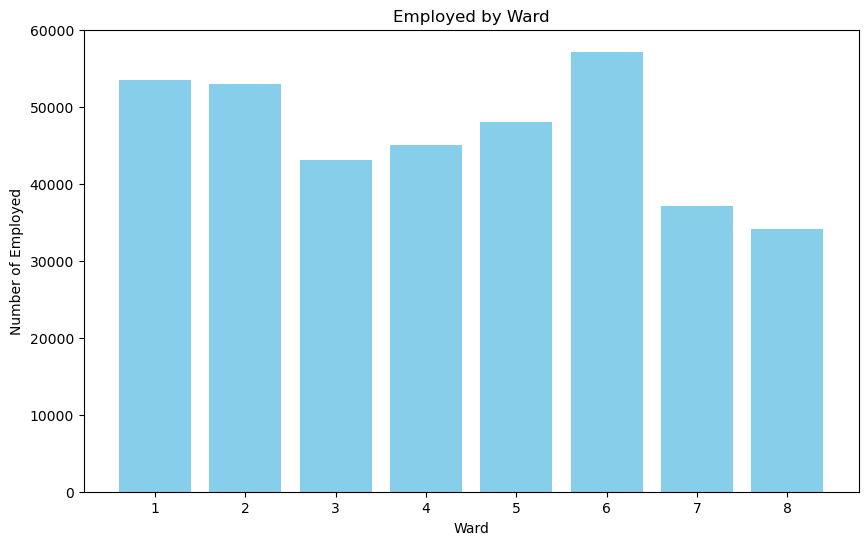

In [97]:
# Ensure your wards have labels (if not, use index numbers)
wards = df_employment_income['ward']

# 1. Most Employed
plt.figure(figsize=(10, 6))
plt.bar(wards, df_employment_income["employed"], color="skyblue")
plt.title("Employed by Ward")
plt.xlabel("Ward")
plt.ylabel("Number of Employed")
plt.xticks(wards)
plt.show()


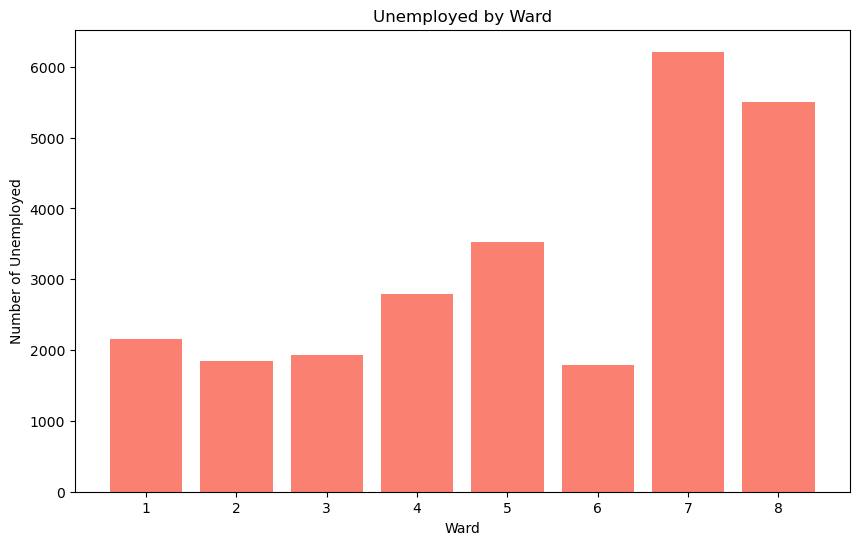

In [98]:
# 2. Most Unemployed
plt.figure(figsize=(10, 6))
plt.bar(wards, df_employment_income["unemployed"], color="salmon")
plt.title("Unemployed by Ward")
plt.xlabel("Ward")
plt.ylabel("Number of Unemployed")
plt.xticks(wards)
plt.show()

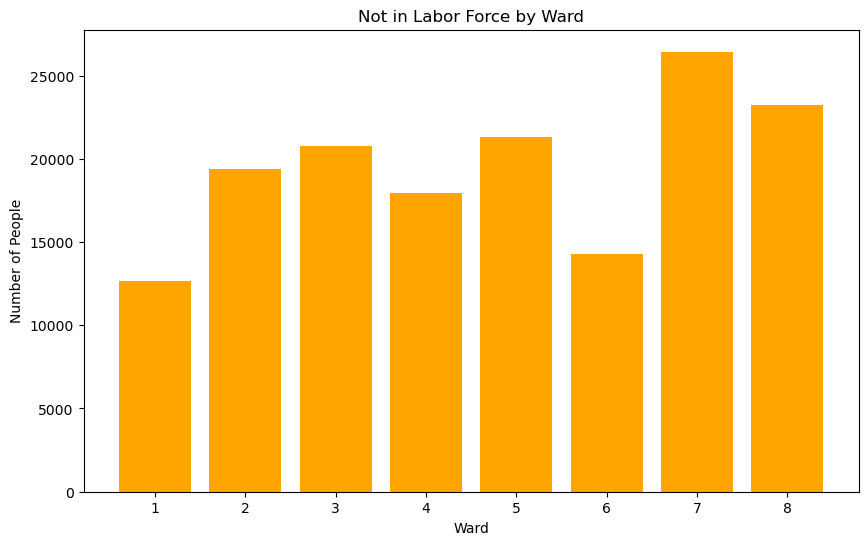

In [99]:
# 3. Most Not in Labor Force
plt.figure(figsize=(10, 6))
plt.bar(wards, df_employment_income["not_in_labor_force"], color="orange")
plt.title("Not in Labor Force by Ward")
plt.xlabel("Ward")
plt.ylabel("Number of People")
plt.xticks(wards)
plt.show()

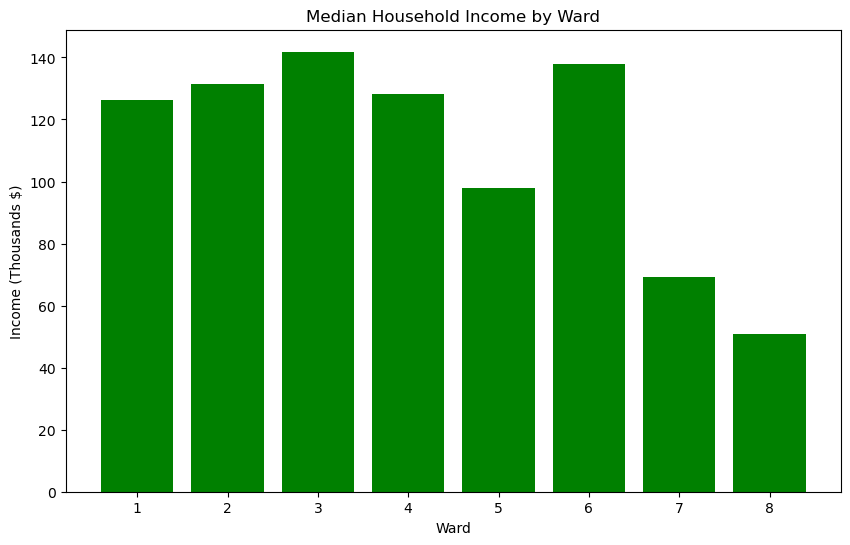

In [100]:
# 4. Highest Income
plt.figure(figsize=(10, 6))
plt.bar(wards, df_employment_income["median_household_income_thousands"], color="green")
plt.title("Median Household Income by Ward")
plt.xlabel("Ward")
plt.ylabel("Income (Thousands $)")
plt.xticks(wards)
plt.show()

### MAPS for WARDS Data


In [101]:
gdf_wards = gpd.read_file("/Users/kimberleybrown/Desktop/CODING_ALL/Code_Academy_Berlin/Module01/Module01_Project03/data_provided/Wards_from_2022.geojson")


# print(df_employment_income.columns)
# print(df_employment_income.head())

# Assuming your GeoDataFrame is called gdf
gdf_wards.isnull()
gdf_wards = gdf_wards[['WARD', 'NAME', 'GEOID', 'geometry']]
# print(gdf_wards.columns)
# print(gdf_wards.head(8))
gdf_wards.info()
# gdf_wards.head(8)

# Sort the GeoDataFrame by the 'WARD' column ascending
gdf_wards = gdf_wards[['WARD', 'NAME', 'GEOID', 'geometry']].sort_values(by='WARD').reset_index(drop=True)

# Check the result
print(gdf_wards[['WARD', 'NAME']])
print(df_employment_income.head(1))



<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   WARD      8 non-null      int32   
 1   NAME      8 non-null      object  
 2   GEOID     8 non-null      object  
 3   geometry  8 non-null      geometry
dtypes: geometry(1), int32(1), object(2)
memory usage: 352.0+ bytes
   WARD    NAME
0     1  Ward 1
1     2  Ward 2
2     3  Ward 3
3     4  Ward 4
4     5  Ward 5
5     6  Ward 6
6     7  Ward 7
7     8  Ward 8
  ward  total_workers_16_plus  employed  unemployed  not_in_labor_force  \
0    1                  68312     53508        2158               12646   

   median_household_income_thousands  
0                             126.39  


In [102]:
gdf_wards['WARD'] = gdf_wards['WARD'].astype(int)
df_employment_income['ward'] = df_employment_income['ward'].astype(int)

# Assuming gdf_wards has 'WARD' as int and df_employment_income has 'ward' as int
wards_merged = gdf_wards.merge(
    df_employment_income,
    left_on='WARD',
    right_on='ward'
)
# Erase redundance
wards_merged = wards_merged.drop(columns=["NAME"])
wards_merged.columns = wards_merged.columns.str.lower()

# Check the merged result
print(wards_merged.head())


   ward           geoid  \
0     1  610U600US11001   
1     2  610U600US11002   
2     3  610U600US11003   
3     4  610U600US11004   
4     5  610U600US11005   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [103]:
print(wards_merged.columns[wards_merged.columns.duplicated()])
wards_merged = wards_merged.loc[:,~wards_merged.columns.duplicated()]
print(wards_merged.columns[wards_merged.columns.duplicated()])

center_lat, center_lon = 38.9, -77.04
ward_figure = folium.Map(location=[center_lat, center_lon], zoom_start=11)

# Add GeoJson layer showing only borders (no fill)
folium.GeoJson(
    wards_merged,
    name="Ward Boundaries",
    style_function=lambda feature: {
        'fillColor': 'transparent',  # no fill color
        'color': 'blue',             # border color
        'weight': 2,                 # border thickness
        'dashArray': '5, 5'          # dashed border for style (optional)
    }
).add_to(ward_figure)

folium.LayerControl().add_to(ward_figure)

ward_figure

Index(['ward'], dtype='object')
Index([], dtype='object')


In [104]:
# Make sure ward column is string
wards_merged['ward'] = wards_merged['ward'].astype(str)

# Create unique colors for each ward
unique_wards = wards_merged['ward'].unique()
color_palette = plt.cm.get_cmap('tab10', len(unique_wards))  # 10-color palette
ward_colors = {
    ward: f'#{int(color_palette(i)[0]*255):02x}{int(color_palette(i)[1]*255):02x}{int(color_palette(i)[2]*255):02x}'
    for i, ward in enumerate(unique_wards)
}

# Create map
center_lat, center_lon = 38.9, -77.04
ward_figure = folium.Map(location=[center_lat, center_lon], zoom_start=11)

# Add GeoJson with fills
folium.GeoJson(
    wards_merged,
    name="Ward Boundaries",
    style_function=lambda feature: {
        'fillColor': ward_colors[feature['properties']['ward']],
        'color': 'black',      # border color
        'weight': 1,           # border thickness
        'fillOpacity': 0.6     # fill transparency
    },
    tooltip=folium.GeoJsonTooltip(fields=['ward'], aliases=['ward:'])
).add_to(ward_figure)

folium.LayerControl().add_to(ward_figure)

ward_figure


/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_87913/969048336.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette = plt.cm.get_cmap('tab10', len(unique_wards))  # 10-color palette


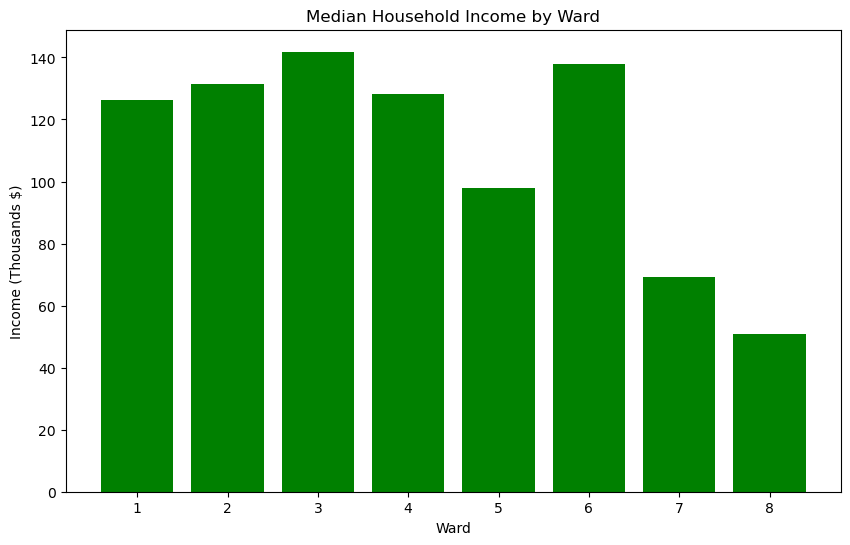

In [105]:
# 4. Highest Income
plt.figure(figsize=(10, 6))
plt.bar(wards, df_employment_income["median_household_income_thousands"], color="green")
plt.title("Median Household Income by Ward")
plt.xlabel("Ward")
plt.ylabel("Income (Thousands $)")
plt.xticks(wards)
plt.show()

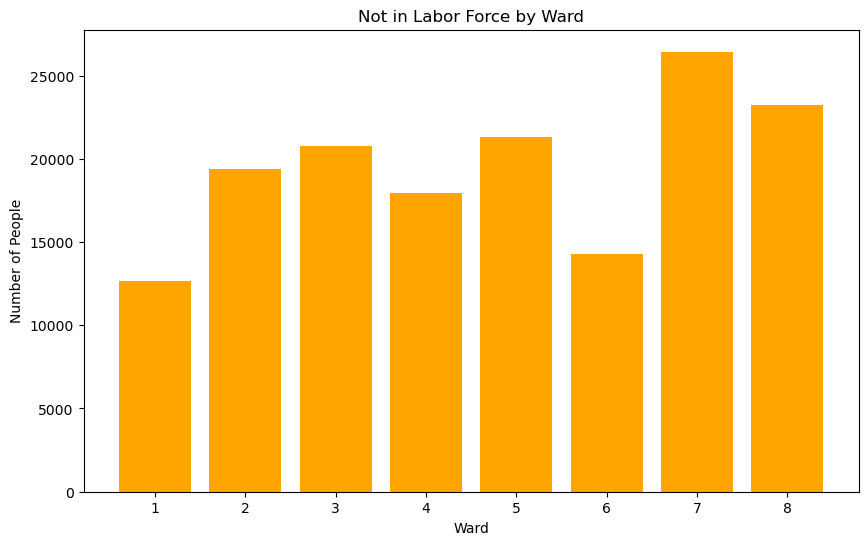

In [106]:
# 3. Most Not in Labor Force
plt.figure(figsize=(10, 6))
plt.bar(wards, df_employment_income["not_in_labor_force"], color="orange")
plt.title("Not in Labor Force by Ward")
plt.xlabel("Ward")
plt.ylabel("Number of People")
plt.xticks(wards)
plt.show()

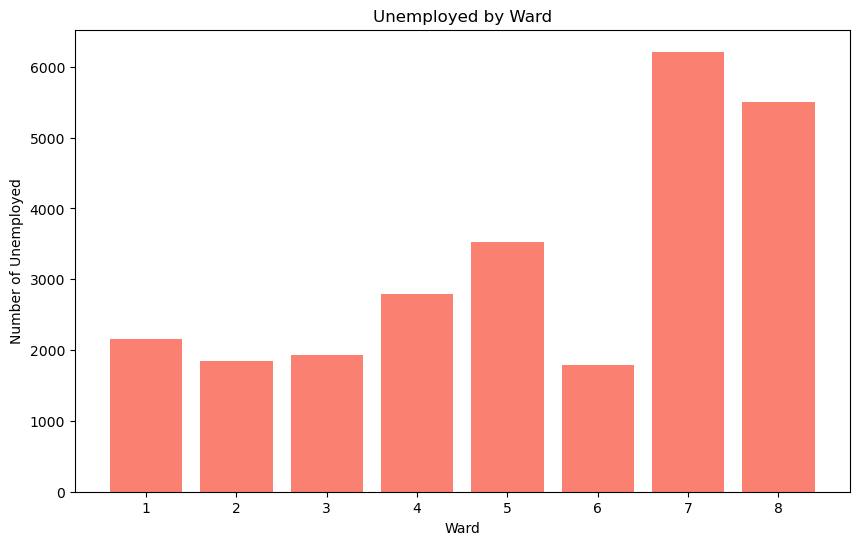

In [107]:
# 2. Most Unemployed
plt.figure(figsize=(10, 6))
plt.bar(wards, df_employment_income["unemployed"], color="salmon")
plt.title("Unemployed by Ward")
plt.xlabel("Ward")
plt.ylabel("Number of Unemployed")
plt.xticks(wards)
plt.show()

### KPI 01: Predictive Maintenance Window (PMW)

In [108]:
df_full['hour'] = pd.to_datetime(df_full['started_at']).dt.hour
df_full['date'] = pd.to_datetime(df_full['started_at']).dt.date


#### Import weather information from csv

In [109]:
# load cleaned weather data
df_weather_clean = pd.read_csv("weather_clean.csv")

# make sure 'date' column is in same format (date, not datetime)
df_weather_clean['date'] = pd.to_datetime(df_weather_clean['date']).dt.date

# merge
df_full = df_full.merge(
    df_weather_clean,
    on=['date', 'hour'],
    how='left'
)

In [110]:
df_full = df_full.drop(columns=['year_y', 'month_y', 'weekday_y'])
df_full = df_full.rename(columns={
    'year_x': 'year',
    'month_x': 'month',
    'weekday_x': 'weekday'
})


#### df_pmw

In [111]:
print(df_full.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'year', 'month', 'weekday', 'day_type', 'holiday',
       'is_holiday', 'season', 'season_name', 'ride_duration_min',
       'geometry_start', 'geometry_end', 'time_block', 'hour', 'date',
       'temperature_2m_(°c)', 'relativehumidity_2m_(%)',
       'weathercode_(wmo code)'],
      dtype='object')


In [112]:
df_pmw = df_full.groupby(
    ['start_station_id', 'date', 'hour'], as_index=False
).agg({
    'ride_id': 'count',
    'year': 'first',
    'month': 'first',
    'weekday': 'first',
    'holiday': 'first',
    'season': 'first',
    'temperature_2m_(°c)': 'first',
    'relativehumidity_2m_(%)': 'first',
    'weathercode_(wmo code)': 'first'
})

df_pmw = df_pmw.rename(columns={'ride_id': 'rides'})


#### Trying to fill in nan values in ride times

In [113]:
stations = df_full['start_station_id'].unique()
dates = df_full['date'].unique()
hours = range(24)

# Step 1: create all combinations
all_combinations = pd.DataFrame(list(itertools.product(stations, dates, hours)), 
                                columns=['start_station_id','date','hour'])

# Step 2: merge with actual rides
df_pmw_full = all_combinations.merge(df_pmw, on=['start_station_id','date','hour'], how='left')

# Step 3: fill missing rides with 0
df_pmw_full['rides'] = df_pmw_full['rides'].fillna(0)

In [114]:
df_pmw_full['rides'].astype('Int64')

0           1
1           0
2           0
3           0
4           0
           ..
20314435    0
20314436    0
20314437    0
20314438    0
20314439    0
Name: rides, Length: 20314440, dtype: Int64

In [115]:
feature_cols = ['year', 'month', 'weekday', 'holiday', 'season',
                'temperature_2m_(°c)', 'relativehumidity_2m_(%)', 'weathercode_(wmo code)']

# Aggregate by date + hour to get representative features
df_features = df_full.groupby(['date', 'hour'])[feature_cols].first().reset_index()

# Merge into full 0-ride dataframe
df_pmw_full = df_pmw_full.merge(df_features, on=['date', 'hour'], how='left')


In [116]:
df_pmw_full['date'] = pd.to_datetime(df_pmw_full['date'])
df_features['date'] = pd.to_datetime(df_features['date'])


In [117]:
df_pmw_full = df_pmw_full.drop(columns=[
    'year_x', 'month_x', 'weekday_x', 'holiday_x', 'season_x',
    'temperature_2m_(°c)_x', 'relativehumidity_2m_(%)_x', 'weathercode_(wmo code)_x'
])


In [118]:
df_pmw_full = df_pmw_full.rename(columns={
    'year_y': 'year',
    'month_y': 'month',
    'weekday_y': 'weekday',
    'holiday_y': 'holiday',
    'season_y': 'season',
    'temperature_2m_(°c)_y': 'temperature',
    'relativehumidity_2m_(%)_y': 'humidity',
    'weathercode_(wmo code)_y': 'weathercode'
})


In [119]:
df_pmw_full.isnull().sum()

start_station_id        0
date                    0
hour                    0
rides                   0
year                34012
month               34012
weekday             34012
holiday             34012
season              34012
temperature         34012
humidity            34012
weathercode         34012
dtype: int64

In [120]:
df_pmw_full = df_pmw_full.drop(
    columns=['year', 'month', 'weekday', 'holiday', 'season',
             'temperature_2m_(°c)', 'relativehumidity_2m_(%)', 'weathercode_(wmo code)'],
    errors='ignore'  # this will ignore any column that doesn’t exist
)

# Ensure both are datetime
df_pmw_full['date'] = pd.to_datetime(df_pmw_full['date'])
df_weather_clean['date'] = pd.to_datetime(df_weather_clean['date'])

# Now merge
df_pmw_full = df_pmw_full.merge(
    df_weather_clean,
    on=['date', 'hour'],
    how='left'
)



In [121]:
df_pmw_full.head(50)

,start_station_id,date,hour,rides,temperature,humidity,weathercode,year,month,weekday,temperature_2m_(°c),relativehumidity_2m_(%),weathercode_(wmo code)
0,31646,2021-01-01,0,1.0,2.4,90.0,1.0,2021.0,1.0,Friday,2.4,90.0,1.0
1,31646,2021-01-01,1,0.0,1.8,88.0,1.0,2021.0,1.0,Friday,1.8,88.0,1.0
2,31646,2021-01-01,2,0.0,1.1,87.0,2.0,2021.0,1.0,Friday,1.1,87.0,2.0
3,31646,2021-01-01,3,0.0,1.6,81.0,2.0,2021.0,1.0,Friday,1.6,81.0,2.0
4,31646,2021-01-01,4,0.0,1.6,77.0,2.0,2021.0,1.0,Friday,1.6,77.0,2.0
5,31646,2021-01-01,5,0.0,1.4,75.0,2.0,2021.0,1.0,Friday,1.4,75.0,2.0
6,31646,2021-01-01,6,0.0,1.4,72.0,2.0,2021.0,1.0,Friday,1.4,72.0,2.0
7,31646,2021-01-01,7,0.0,1.4,71.0,3.0,2021.0,1.0,Friday,1.4,71.0,3.0
8,31646,2021-01-01,8,0.0,1.4,71.0,3.0,2021.0,1.0,Friday,1.4,71.0,3.0
9,31646,2021-01-01,9,0.0,1.6,70.0,3.0,2021.0,1.0,Friday,1.6,70.0,3.0


In [122]:
df_pmw_full.isnull().sum()

start_station_id               0
date                           0
hour                           0
rides                          0
temperature                34012
humidity                   34012
weathercode                34012
year                        8503
month                       8503
weekday                     8503
temperature_2m_(°c)         8503
relativehumidity_2m_(%)     8503
weathercode_(wmo code)      8503
dtype: int64

In [123]:
# Make sure 'date' is datetime
df_weather_clean['date'] = pd.to_datetime(df_weather_clean['date'])

# Create all date/hour combinations that should exist
dates = df_weather_clean['date'].unique()
hours = range(24)
all_date_hour = pd.DataFrame(list(itertools.product(dates, hours)), columns=['date','hour'])

# Merge with weather data to see which combinations are missing
df_check = all_date_hour.merge(df_weather_clean, on=['date','hour'], how='left')

# Count missing values per column
missing_counts = df_check.isnull().sum()
print(missing_counts)


date                        0
hour                        0
year                       11
month                      11
weekday                    11
temperature_2m_(°c)        11
relativehumidity_2m_(%)    11
weathercode_(wmo code)     11
dtype: int64


In [124]:
df_weather_clean = df_weather_clean.sort_values(['date','hour'])
df_weather_clean[['temperature_2m_(°c)','relativehumidity_2m_(%)','weathercode_(wmo code)']] = \
    df_weather_clean[['temperature_2m_(°c)','relativehumidity_2m_(%)','weathercode_(wmo code)']].interpolate()


In [125]:
missing_counts = df_weather_clean.isnull().sum()
print(missing_counts)

date                       0
hour                       0
year                       0
month                      0
weekday                    0
temperature_2m_(°c)        0
relativehumidity_2m_(%)    0
weathercode_(wmo code)     0
dtype: int64


In [126]:
# Drop any old weather columns in df_pmw_full so the merge is clean
cols_to_drop = ['temperature_2m_(°c)', 'relativehumidity_2m_(%)', 'weathercode_(wmo code)']
df_pmw_full = df_pmw_full.drop(columns=cols_to_drop, errors='ignore')

# Ensure 'date' is datetime in both dfs
df_pmw_full['date'] = pd.to_datetime(df_pmw_full['date'])
df_weather_clean['date'] = pd.to_datetime(df_weather_clean['date'])

# Merge weather info (gap-free) into df_pmw_full
df_pmw_full = df_pmw_full.merge(
    df_weather_clean,
    on=['date', 'hour'],
    how='left'
)


In [127]:
df_pmw_full.isnull().sum()

start_station_id               0
date                           0
hour                           0
rides                          0
temperature                34012
humidity                   34012
weathercode                34012
year_x                      8503
month_x                     8503
weekday_x                   8503
year_y                      8503
month_y                     8503
weekday_y                   8503
temperature_2m_(°c)         8503
relativehumidity_2m_(%)     8503
weathercode_(wmo code)      8503
dtype: int64

In [128]:
cols_to_drop = [
    'temperature', 'humidity', 'weathercode',
    'temperature_2m_(°c)', 'relativehumidity_2m_(%)', 'weathercode_(wmo code)',
    'year_x', 'month_x', 'weekday_x',
    'year_y', 'month_y', 'weekday_y'
]
df_pmw_full = df_pmw_full.drop(columns=cols_to_drop, errors='ignore')


In [129]:
df_pmw_full['date'] = pd.to_datetime(df_pmw_full['date'])
df_weather_clean['date'] = pd.to_datetime(df_weather_clean['date'])


In [130]:
df_pmw_full = df_pmw_full.merge(
    df_weather_clean,
    on=['date', 'hour'],
    how='left'
)


In [131]:
df_pmw_full.isnull().sum()

start_station_id              0
date                          0
hour                          0
rides                         0
year                       8503
month                      8503
weekday                    8503
temperature_2m_(°c)        8503
relativehumidity_2m_(%)    8503
weathercode_(wmo code)     8503
dtype: int64

In [132]:
# All unique date/hour combinations in df_pmw_full
pmw_dates_hours = df_pmw_full[['date','hour']].drop_duplicates()

# Merge with weather data to see which combinations are missing
df_check = pmw_dates_hours.merge(df_weather_clean, on=['date','hour'], how='left', indicator=True)

# Rows that have no weather info
missing_weather_rows = df_check[df_check['_merge'] == 'left_only']
print(missing_weather_rows)


            date  hour  year  month weekday  temperature_2m_(°c)  \
483   2021-01-21     3   NaN    NaN     NaN                  NaN   
507   2021-01-22     3   NaN    NaN     NaN                  NaN   
771   2021-02-02     3   NaN    NaN     NaN                  NaN   
794   2021-02-03     2   NaN    NaN     NaN                  NaN   
937   2021-02-09     1   NaN    NaN     NaN                  NaN   
1178  2021-02-19     2   NaN    NaN     NaN                  NaN   
1179  2021-02-19     3   NaN    NaN     NaN                  NaN   
1730  2021-03-14     2   NaN    NaN     NaN                  NaN   
8834  2022-01-04     2   NaN    NaN     NaN                  NaN   
10466 2022-03-13     2   NaN    NaN     NaN                  NaN   
19202 2023-03-12     2   NaN    NaN     NaN                  NaN   

       relativehumidity_2m_(%)  weathercode_(wmo code)     _merge  
483                        NaN                     NaN  left_only  
507                        NaN                 

In [133]:

# Make sure 'date' is datetime
df_weather_clean['date'] = pd.to_datetime(df_weather_clean['date'])
df_pmw_full['date'] = pd.to_datetime(df_pmw_full['date'])

# Step 1: create all combinations of dates and hours in your ride data
all_dates = pd.date_range(start=df_pmw_full['date'].min(), end=df_pmw_full['date'].max())
all_hours = range(24)
all_date_hour = pd.DataFrame(list(itertools.product(all_dates, all_hours)), columns=['date','hour'])

# Step 2: merge your existing weather onto this full grid
df_weather_full = all_date_hour.merge(df_weather_clean, on=['date','hour'], how='left')

# Step 3: sort and fill missing weather data
df_weather_full = df_weather_full.sort_values(['date','hour'])
df_weather_full[['temperature_2m_(°c)','relativehumidity_2m_(%)','weathercode_(wmo code)']] = \
    df_weather_full[['temperature_2m_(°c)','relativehumidity_2m_(%)','weathercode_(wmo code)']].ffill().bfill()

# Now df_weather_full has weather info for every hour of every day in df_pmw_full
# Step 4: merge this back into your rides dataframe
df_pmw_full = df_pmw_full.drop(
    columns=['temperature_2m_(°c)','relativehumidity_2m_(%)','weathercode_(wmo code)'],
    errors='ignore'
)

df_pmw_full = df_pmw_full.merge(
    df_weather_full,
    on=['date', 'hour'],
    how='left'
)

# Check
df_pmw_full.isnull().sum()


start_station_id              0
date                          0
hour                          0
rides                         0
year_x                     8503
month_x                    8503
weekday_x                  8503
year_y                     8503
month_y                    8503
weekday_y                  8503
temperature_2m_(°c)           0
relativehumidity_2m_(%)       0
weathercode_(wmo code)        0
dtype: int64

In [134]:
# Drop old merge leftovers
df_pmw_full = df_pmw_full.drop(columns=['year_x','month_x','weekday_x','year_y','month_y','weekday_y'], errors='ignore')

# Rename weather columns for simplicity
df_pmw_full = df_pmw_full.rename(columns={
    'temperature_2m_(°c)': 'temperature',
    'relativehumidity_2m_(%)': 'humidity',
    'weathercode_(wmo code)': 'weathercode'
})

# Check final dataframe
df_pmw_full.isnull().sum()


start_station_id    0
date                0
hour                0
rides               0
temperature         0
humidity            0
weathercode         0
dtype: int64

In [135]:
# Make sure date is datetime
df_pmw_full['date'] = pd.to_datetime(df_pmw_full['date'])

# Extract year, month, weekday from date
df_pmw_full['year'] = df_pmw_full['date'].dt.year
df_pmw_full['month'] = df_pmw_full['date'].dt.month
df_pmw_full['weekday'] = df_pmw_full['date'].dt.day_name()

# Check
df_pmw_full[['date','year','month','weekday']].head()


,date,year,month,weekday
0,2021-01-01,2021,1,Friday
1,2021-01-01,2021,1,Friday
2,2021-01-01,2021,1,Friday
3,2021-01-01,2021,1,Friday
4,2021-01-01,2021,1,Friday


In [136]:
df_pmw_full.isna().sum()

start_station_id    0
date                0
hour                0
rides               0
temperature         0
humidity            0
weathercode         0
year                0
month               0
weekday             0
dtype: int64

In [137]:
df_pmw_full.head(100)

,start_station_id,date,hour,rides,temperature,humidity,weathercode,year,month,weekday
0,31646,2021-01-01,0,1.0,2.4,90.0,1.0,2021,1,Friday
1,31646,2021-01-01,1,0.0,1.8,88.0,1.0,2021,1,Friday
2,31646,2021-01-01,2,0.0,1.1,87.0,2.0,2021,1,Friday
3,31646,2021-01-01,3,0.0,1.6,81.0,2.0,2021,1,Friday
4,31646,2021-01-01,4,0.0,1.6,77.0,2.0,2021,1,Friday
...,...,...,...,...,...,...,...,...,...,...
95,31646,2021-01-04,23,0.0,4.2,88.0,3.0,2021,1,Monday
96,31646,2021-01-05,0,0.0,3.6,90.0,3.0,2021,1,Tuesday
97,31646,2021-01-05,1,0.0,3.3,91.0,3.0,2021,1,Tuesday
98,31646,2021-01-05,2,0.0,3.1,91.0,3.0,2021,1,Tuesday


In [138]:
df_pmw_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20314440 entries, 0 to 20314439
Data columns (total 10 columns):
 #   Column            Dtype         
---  ------            -----         
 0   start_station_id  int64         
 1   date              datetime64[ns]
 2   hour              int64         
 3   rides             float64       
 4   temperature       float64       
 5   humidity          float64       
 6   weathercode       float64       
 7   year              int32         
 8   month             int32         
 9   weekday           object        
dtypes: datetime64[ns](1), float64(4), int32(2), int64(2), object(1)
memory usage: 1.4+ GB


In [139]:
print(df_pmw_full.columns)


Index(['start_station_id', 'date', 'hour', 'rides', 'temperature', 'humidity',
       'weathercode', 'year', 'month', 'weekday'],
      dtype='object')


In [140]:
# 1. Ensure rides and weathercode are integers
df_pmw_full['rides'] = df_pmw_full['rides'].astype('Int64')
df_pmw_full['weathercode'] = df_pmw_full['weathercode'].astype('Int64')

# 2. One-hot encode weekday
df_pmw_full = pd.get_dummies(df_pmw_full, columns=['weekday'], drop_first=False)

# 3. One-hot encode weathercode
df_pmw_full = pd.get_dummies(df_pmw_full, columns=['weathercode'], prefix='weather', drop_first=False)

# 4. Optional: one-hot encode month if you want month-specific effects
df_pmw_full = pd.get_dummies(df_pmw_full, columns=['month'], prefix='month', drop_first=False)

# Now df_pmw_full is ready for regression


In [141]:
df_pmw_full.head(200)

,start_station_id,date,hour,rides,temperature,humidity,year,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_0,weather_1,weather_2,weather_3,weather_51,weather_53,weather_55,weather_61,weather_63,weather_65,weather_71,weather_73,weather_75,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,31646,2021-01-01,0,1,2.4,90.0,2021,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,31646,2021-01-01,1,0,1.8,88.0,2021,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,31646,2021-01-01,2,0,1.1,87.0,2021,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,31646,2021-01-01,3,0,1.6,81.0,2021,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,31646,2021-01-01,4,0,1.6,77.0,2021,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,31646,2021-01-09,3,0,-0.4,58.0,2021,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
196,31646,2021-01-09,4,0,-0.5,54.0,2021,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
197,31646,2021-01-09,5,0,-0.9,51.0,2021,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
198,31646,2021-01-09,6,0,-1.2,49.0,2021,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [142]:
# Keep only months July (7) to October (10)
df_jul_oct = df_pmw_full[df_pmw_full['month_7'] | df_pmw_full['month_8'] | df_pmw_full['month_9'] | df_pmw_full['month_10']]


In [143]:
months_to_keep = ['month_7', 'month_8', 'month_9', 'month_10']
months_to_drop = [f'month_{i}' for i in range(1,13) if f'month_{i}' not in months_to_keep]

df_jul_oct = df_jul_oct.drop(columns=months_to_drop)


In [144]:
df_jul_oct.head(1000)
df_jul_oct['start_station_id']

4344        31646
4345        31646
4346        31646
4347        31646
4348        31646
            ...  
20312971    31385
20312972    31385
20312973    31385
20312974    31385
20312975    31385
Name: start_station_id, Length: 6845688, dtype: int64

### Add clusters to df

In [145]:
# # Step 1: Filter station_summary to only Superstars
# superstars = station_summary[station_summary["cluster"] == "Superstars"]

# # Step 2: Merge with df_jul_oct to keep only those stations
# df_superstars = df_jul_oct.merge(
#     superstars[["start_station_id", "cluster"]],
#     on="start_station_id",
#     how="inner"
# )

# df_superstars['start_station_id'].nunique()


In [146]:
df_jul_oct = df_jul_oct.drop("date", axis=1)


In [147]:
df_jul_oct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6845688 entries, 4344 to 20312975
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   start_station_id   int64  
 1   hour               int64  
 2   rides              Int64  
 3   temperature        float64
 4   humidity           float64
 5   year               int32  
 6   weekday_Friday     bool   
 7   weekday_Monday     bool   
 8   weekday_Saturday   bool   
 9   weekday_Sunday     bool   
 10  weekday_Thursday   bool   
 11  weekday_Tuesday    bool   
 12  weekday_Wednesday  bool   
 13  weather_0          bool   
 14  weather_1          bool   
 15  weather_2          bool   
 16  weather_3          bool   
 17  weather_51         bool   
 18  weather_53         bool   
 19  weather_55         bool   
 20  weather_61         bool   
 21  weather_63         bool   
 22  weather_65         bool   
 23  weather_71         bool   
 24  weather_73         bool   
 25  weather_75         

In [148]:
df_jul_oct['rides'].head(100)

4344    1
4345    0
4346    0
4347    0
4348    0
       ..
4439    7
4440    5
4441    1
4442    0
4443    0
Name: rides, Length: 100, dtype: Int64

#### df Superstar Station

In [149]:
# Step 1: Filter station_summary to only Superstars
superstars = station_summary[station_summary["cluster"] == "Superstars"]

# Step 2: Merge with df_jul_oct to keep only those stations
df_superstars = df_jul_oct.merge(
    superstars[["start_station_id", "cluster"]],
    on="start_station_id",
    how="inner"
)

df_superstars['start_station_id'].nunique()




11

In [150]:
df_superstars = df_superstars.drop(columns=['cluster'])

In [151]:
# One-hot encode start_station_id
df_superstars_encoded = pd.get_dummies(
    df_superstars, 
    columns=["start_station_id"], 
    prefix="station"
)


In [152]:
df_superstars_encoded.head()


,hour,rides,temperature,humidity,year,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_0,weather_1,weather_2,weather_3,weather_51,weather_53,weather_55,weather_61,weather_63,weather_65,weather_71,weather_73,weather_75,month_7,month_8,month_9,month_10,station_31101,station_31201,station_31229,station_31247,station_31258,station_31288,station_31289,station_31600,station_31603,station_31613,station_31623
0,0,0,26.1,79.0,2021,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,1,0,25.4,82.0,2021,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,2,0,24.8,85.0,2021,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,3,0,24.1,85.0,2021,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,4,0,24.0,85.0,2021,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


#### Regression PMW

In [153]:
X = df_superstars_encoded.drop("rides", axis=1) 
y = df_superstars_encoded["rides"].to_frame() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [154]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train.values)

X_train = pd.DataFrame(scaler.transform(X_train.values), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test.values), columns=X_test.columns)

In [155]:
X_train.head(3)


,hour,temperature,humidity,year,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_0,weather_1,weather_2,weather_3,weather_51,weather_53,weather_55,weather_61,weather_63,weather_65,weather_71,weather_73,weather_75,month_7,month_8,month_9,month_10,station_31101,station_31201,station_31229,station_31247,station_31258,station_31288,station_31289,station_31600,station_31603,station_31613,station_31623
0,1.375254,0.174045,0.196773,-1.226046,-0.409635,-0.409998,-0.414259,-0.412876,-0.40443,2.475114,-0.402452,1.076523,-0.548548,-0.329872,-0.341843,-0.234283,-0.141229,-0.0818,-0.117764,-0.096159,-0.040719,0.0,0.0,0.0,-0.578812,-0.583198,1.762018,-0.579859,-0.315104,-0.315743,-0.316431,-0.31594,-0.316553,3.150972,-0.315817,-0.315571,-0.317338,-0.315817,-0.316823
1,-1.512517,-0.253444,1.036874,-0.001116,-0.409635,2.439038,-0.414259,-0.412876,-0.40443,-0.404022,-0.402452,1.076523,-0.548548,-0.329872,-0.341843,-0.234283,-0.141229,-0.0818,-0.117764,-0.096159,-0.040719,0.0,0.0,0.0,1.727676,-0.583198,-0.567531,-0.579859,3.173556,-0.315743,-0.316431,-0.31594,-0.316553,-0.317362,-0.315817,-0.315571,-0.317338,-0.315817,-0.316823
2,-0.646186,1.456512,-1.674362,1.223814,-0.409635,-0.409998,-0.414259,-0.412876,-0.40443,-0.404022,2.484769,-0.928917,-0.548548,3.031477,-0.341843,-0.234283,-0.141229,-0.0818,-0.117764,-0.096159,-0.040719,0.0,0.0,0.0,1.727676,-0.583198,-0.567531,-0.579859,-0.315104,3.167130,-0.316431,-0.31594,-0.316553,-0.317362,-0.315817,-0.315571,-0.317338,-0.315817,-0.316823


In [156]:
LR_model = LinearRegression()
LR_model.fit(X_train.values, y_train.values)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [157]:
preds = LR_model.predict(X_test.values)

evaluate_preds = pd.DataFrame({
    "pred": preds.flatten(),
    "actual": y_test["rides"]
})

evaluate_preds.head(500)

,pred,actual
18088,6.048741,5
83804,6.152647,4
89606,4.524098,5
12813,6.543483,6
28974,3.718404,0
...,...,...
15774,5.450882,3
93321,2.216575,6
36260,5.414878,3
46838,5.356262,4


<Axes: xlabel='pred', ylabel='actual'>

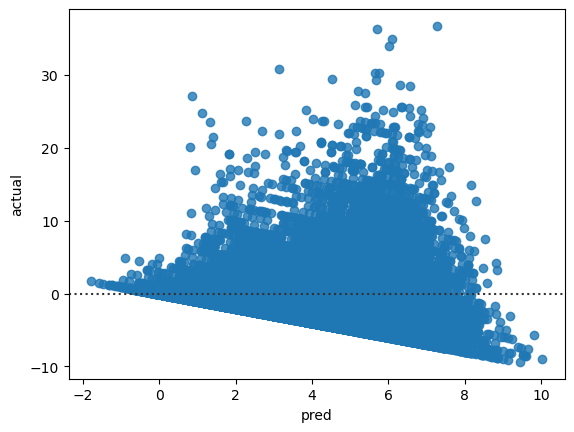

In [158]:
sns.residplot(evaluate_preds, x="pred", y="actual")
#, lowess=True, line_kws={'color':'orange'})

In [159]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Let's say degree = 2 for now
degree = 2

# Make a pipeline: Polynomial expansion + Linear Regression
poly_model = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=False),
    LinearRegression()
)

poly_model.fit(X_train, y_train)

preds_poly = poly_model.predict(X_test)

# Evaluate
evaluate_preds_poly = pd.DataFrame({
    "pred": preds_poly.flatten(),
    "actual": y_test["rides"]
})

evaluate_preds_poly.head()

,pred,actual
18088,6.337904,5
83804,6.507400,4
89606,5.980696,5
12813,6.858665,6
28974,5.976009,0


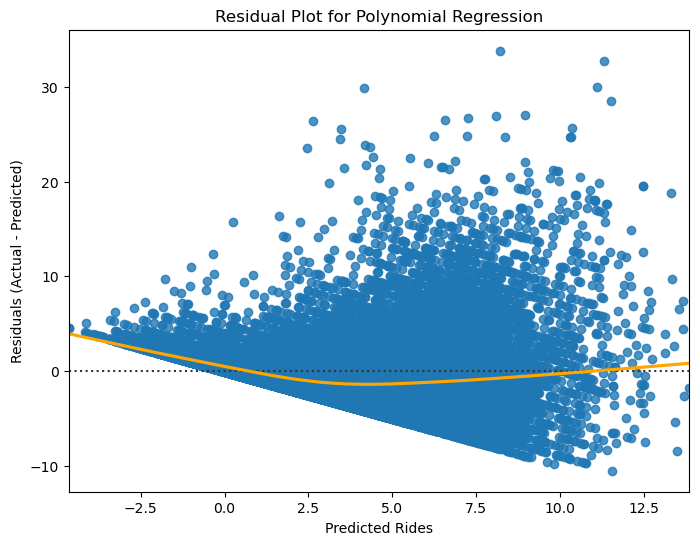

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
evaluate_preds_poly["residuals"] = (
    evaluate_preds_poly["actual"] - evaluate_preds_poly["pred"]
)

# Residual plot
plt.figure(figsize=(8,6))
sns.residplot(
    x=evaluate_preds_poly["pred"],
    y=evaluate_preds_poly["actual"],
    lowess=True,
    line_kws={'color': 'orange'}
)
plt.xlabel("Predicted Rides")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for Polynomial Regression")
plt.show()


In [166]:
mae = mean_absolute_error(y_test, preds)
msqe = mean_squared_error(y_test, preds)
rmsqe = root_mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("mean absolute error:     ", mae)
print("mean squared error:      ", msqe)
print("root mean squared error: ", rmsqe)
print("r squared:               ", r2)

mean absolute error:      3.177393530906892
mean squared error:       20.10665287994142
root mean squared error:  4.48404425490443
r squared:                0.16747593750016154


In [167]:
df_superstars["rides"].describe()


count     97416.0
mean     4.140275
std      4.897349
min           0.0
25%           0.0
50%           3.0
75%           6.0
max          57.0
Name: rides, dtype: Float64